# **Sumário da Análise Exploratória de Dados (EDA) – Dataset de Evasão EdTech**

## **1. Características Gerais do Dataset**

* O dataset analisado contém informações de **500 alunos**.
* Inicialmente, o dataset possuía **14 colunas (features)**, incluindo dados demográficos, informações sobre o curso, métricas de engajamento na plataforma e o tipo de dispositivo utilizado.
* A variável alvo para predição é `evadiu_30_dias`, indicando se o aluno abandonou o curso nos primeiros 30 dias.

---
## **2. Qualidade dos Dados e Processo de Limpeza**

* **Dados Ausentes:**
    * A coluna `education_level` (nome original) foi a única a apresentar dados ausentes, com 107 valores faltantes (21.4% do total para esta feature).
    * A estratégia adotada foi a imputação pela criação de uma nova categoria, **"Não Informado"**, para preservar os registros e permitir que a ausência de informação pudesse ser analisada como um fator.
* **Tratamento de Outliers:**
    * Outliers foram identificados nas colunas numéricas `age` (idade), `avg_minutes_per_session` (media\_minutos\_por\_sessao), `total_sessions` (total\_sessoes), `forum_posts` (posts\_forum), e `messages_to_tutor` (mensagens\_tutor).
    * A principal estratégia foi o **capping no percentil 95** para as colunas de engajamento, visando reduzir a influência de valores extremos.
    * A coluna `idade` não sofreu capping para manter a variabilidade original, e `media_minutos_por_sessao` foi arredondada para duas casas decimais.
    * Colunas numéricas que representavam contagens foram convertidas para o tipo `int` após as transformações.
* **Linhas Duplicadas:** Nenhuma linha duplicada foi encontrada.
* **Consistência, Traduções e Re-rotulagens:**
    * Todos os nomes das colunas foram traduzidos para o português.
    * Os valores dentro das principais colunas categóricas (`nivel_educacional`, `categoria_curso`, `genero`, `tipo_assinatura`) e binárias (`concluiu_primeiro_quiz`, `evadiu_30_dias`) foram traduzidos e/ou re-rotulados para português ou termos descritivos, resultando em um dataset final mais claro e interpretável.

---
## **3. Análise da Variável Alvo (`evadiu_30_dias`)**

* O dataset exibe um **desbalanceamento de classes** considerável:
    * **Não Evadiu:** 421 alunos (84.2%)
    * **Evadiu:** 79 alunos (15.8%)
* **Implicações:** Este desbalanceamento exigirá atenção na fase de modelagem, com possível uso de técnicas de reamostragem (como SMOTE ou ajuste de pesos de classe) e a escolha de métricas de avaliação apropriadas (Precisão, Recall, F1-Score, AUC-PR), especialmente para a classe minoritária "Evadiu".

---
## **4. Principais Insights da Análise Bivariada**

### Relação das Variáveis Numéricas com a Evasão:

* `idade`: Alunos que evadiram apresentaram uma média de idade ligeiramente superior (39.3 anos vs. 37.9 anos), com medianas também um pouco maiores (41 vs. 39 anos). A diferença é sutil.
* `dias_ativo_primeira_semana`: Alunos que não evadiram foram, em média, um pouco mais ativos (3.43 dias) do que os que evadiram (3.14 dias). Diferença pequena.
* `media_minutos_por_sessao`: Não apresentou distinção clara entre os grupos; as médias e medianas foram muito próximas.
* `total_sessoes`: **Diferença mais expressiva.** Alunos que **não evadiram** tiveram um número de sessões consideravelmente maior (média 15.7, mediana 16) em comparação com os que **evadiram** (média 12.0, mediana 9).
* `posts_forum` e `mensagens_tutor`: Ambas as variáveis mostraram diferenças mínimas entre os grupos, com baixa frequência de uso geral.

### **Relação das Variáveis Categóricas com a Evasão (Taxa de Evasão % por Categoria):**

* `genero`: Taxas de evasão próximas entre as categorias: Masculino (16.8%), Feminino (15.1%), Outro (14.9%).
* `nivel_educacional`: Maiores taxas para "Não Informado" (18.7%) e "Ensino Médio" (16.9%). Menor taxa para "Graduando(a)" (13.3%).
* `categoria_curso`: "Design" apresentou a maior taxa de evasão (20.5%), enquanto "Idiomas" teve a menor (12.8%).
* `concluiu_primeiro_quiz`: Quem "Não Concluiu" o primeiro quiz teve uma taxa de evasão ligeiramente maior (17.1%) vs. quem "Concluiu" (13.8%).
* `tipo_assinatura`: Assinantes "Grátis" tiveram uma taxa de evasão maior (17.4%) em comparação com os assinantes "Pago" (12.1%).
* `tipo_dispositivo`: Usuários de **"Mobile"** mostraram a **menor taxa de evasão (10.2%)**. "Tablet" teve a maior taxa (19.8%), seguido por "Desktop" (17.4%).

---
## **5. Padrões Comportamentais Preliminares e Perfis de Risco**

Com base na análise bivariada, alguns padrões começam a emergir:

* **Potenciais Indicadores de Maior Risco de Evasão:**
    * Baixo `total_sessoes`.
    * Não ter concluído o primeiro quiz.
    * Uso de `tipo_dispositivo` "Tablet" ou "Desktop".
    * Inscrição na `categoria_curso` "Design".
    * Possuir `tipo_assinatura` "Grátis".
    * `nivel_educacional` "Não Informado" ou "Ensino Médio".
* **Potenciais Indicadores de Menor Risco de Evasão (Maior Retenção):**
    * Alto `total_sessoes`.
    * Ter concluído o primeiro quiz.
    * Uso de `tipo_dispositivo` "Mobile".
    * Inscrição na `categoria_curso` "Idiomas".
    * Possuir `tipo_assinatura` "Pago".
    * `nivel_educacional` "Graduando(a)".

---
## **6. Considerações sobre os Dados e Próximos Passos**

* O dataset de 500 amostras é relativamente pequeno, o que pode ser uma limitação para modelos muito complexos e para a generalização dos achados.
* As features de interação social (`posts_forum`, `mensagens_tutor`) mostraram baixa atividade para a maioria dos alunos, o que pode reduzir seu impacto individual como preditores.
* A variável `student_id` foi mantida apenas para fins de rastreabilidade e não será usada na modelagem.
* As variáveis que se mostraram mais promissoras e com maior potencial preditivo até o momento são: `total_sessoes`, `tipo_dispositivo`, `categoria_curso`, `tipo_assinatura`, `nivel_educacional`, e `concluiu_primeiro_quiz`.
* O próximo passo natural é a **Engenharia de Features** (se aplicável, como criar variáveis de interação ou agrupar categorias) e, em seguida, a **Preparação dos Dados para Modelagem** (como codificação de variáveis categóricas) e a **Construção dos Modelos de Machine Learning**.

---

In [1]:
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## **1. Características Gerais do Dataset**
Carregando e Explorando os Dados dos Alunos

Para isso, utilizamos um código que faz o seguinte:
1.  Conecta-se ao Google Drive para acessar o arquivo onde os dados estão guardados.
2.  Importa algumas ferramentas essenciais (bibliotecas) que nos ajudam a trabalhar com tabelas de dados (`pandas`), criar gráficos (`matplotlib`) e realizar cálculos numéricos (`numpy`).
3.  Carrega o arquivo de dados (um arquivo CSV) para uma tabela virtual, que chamamos de `df`.
4.  Mostra uma pequena amostra dos dados e um resumo técnico para começarmos a entendê-los.

In [ ]:
file_path = '/content/drive/My Drive/desafio_viitra/Database/edtech_dropout_dataset.csv'

In [ ]:
# Tentar carregar o dataset
try:
    df = pd.read_csv(file_path)
    print("Dataset carregado com sucesso!")

    # Primeiras visualizações dos dados
    print("\nPrimeiras 5 linhas do dataset:")
    print(df.head())

    print("\nInformações gerais do dataset:")
    df.info()

    print("\nDimensões do dataset (linhas, colunas):")
    print(df.shape)

except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado em '{file_path}'.")
    print("Verifique o caminho e o nome do arquivo, e se a pasta 'desafio_viitra' existe no seu Google Drive.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o dataset: {e}")

Dataset carregado com sucesso!

Primeiras 5 linhas do dataset:
  student_id  age  gender education_level course_category  \
0      S0000   54  Female        Graduate          Design   
1      S0001   44  Female             NaN            Tech   
2      S0002   30    Male        Graduate       Languages   
3      S0003   58   Other        Graduate        Business   
4      S0004   23    Male        Graduate        Business   

   days_active_first_week  avg_minutes_per_session  total_sessions  \
0                       6                    49.66              27   
1                       5                     2.07              23   
2                       0                    19.45              27   
3                       2                    58.91               5   
4                       0                    29.54              25   

   completed_first_quiz  forum_posts  messages_to_tutor subscription_type  \
0                     0            1                  0              Fre

*Esta amostra nos mostra o tipo de informação que temos para cada aluno, como um código de identificação (`student_id`), idade (`age`), gênero (`gender`), nível de escolaridade (`education_level`), categoria do curso (`course_category`), e diversas métricas de como ele usou a plataforma nos primeiros dias. A coluna `dropout_within_30_days` é a mais importante para nós, pois indica se o aluno evadiu (valor 1) ou não (valor 0).*

*Este resumo técnico nos diz que a tabela tem informações sobre **500 alunos** (500 `entries` ou linhas) e **14 características** diferentes para cada um (14 `columns`).*
*A coluna `Non-Null Count` (Contagem de Não Nulos) é importante: ela mostra quantos alunos têm informação preenchida para cada característica. Notamos que a coluna `education_level` tem apenas **393** valores preenchidos de 500. Isso significa que temos **dados ausentes** (informação faltando) para o nível de escolaridade de alguns alunos, e precisaremos tratar isso.*
*`Dtype` nos diz o tipo de dado em cada coluna: `object` geralmente significa texto, `int64` são números inteiros, e `float64` são números com casas decimais.*

---
**Dimensões da Tabela:**
(500, 14)

*Isso confirma: 500 linhas (alunos) e 14 colunas (características).*

Com esta primeira visão geral, já identificamos um ponto importante para nossa próxima etapa de "limpeza" dos dados: a necessidade de tratar os valores ausentes na coluna `education_level`.


# **Verificando a Qualidade dos Dados**

Nesta etapa, usamos um código para fazer um "check-up" em todas as colunas da nossa tabela e identificar:
1.  Quantos valores estão faltando em cada coluna.
2.  Qual a porcentagem que esses valores faltantes representam do total de informações daquela coluna.



In [ ]:
# Calcular a quantidade de valores ausentes por coluna
missing_values = df.isnull().sum()

# Calcular a porcentagem de valores ausentes por coluna
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Criar um DataFrame para mostrar os resultados de forma organizada
missing_info = pd.DataFrame({
    'Valores Ausentes': missing_values,
    'Porcentagem Ausente (%)': missing_percentage
})

# Mostrar apenas as colunas que têm valores ausentes
print("Informações sobre valores ausentes:")
print(missing_info[missing_info['Valores Ausentes'] > 0].sort_values(by='Valores Ausentes', ascending=False))

Informações sobre valores ausentes:
                 Valores Ausentes  Porcentagem Ausente (%)
education_level               107                     21.4


**O que isso significa?**

* Apenas uma coluna apresentou informações faltantes: `education_level` (Nível de Escolaridade do aluno).
* Nesta coluna, existem **107 "Valores Ausentes"** (ou seja, para 107 alunos, não temos a informação sobre seu nível de escolaridade).
* Esses 107 valores representam **21.4%** do total de informações que deveríamos ter para a coluna `education_level`.

**Por que isso é importante?**

Saber que temos uma quantidade significativa de dados ausentes (mais de 20%) em uma coluna específica (`education_level`) nos alerta que precisaremos definir uma estratégia para lidar com isso. Simplesmente ignorar esses dados faltantes poderia levar a conclusões incompletas ou enviesadas sobre o comportamento dos nossos alunos.

# **Visualizando os Dados Ausentes**

Depois de identificar que a coluna `education_level` tem informações faltando, uma boa ideia é tentar visualizar esses "buracos" nos dados. Para isso, usamos uma biblioteca gráfica chamada missingno.

O código a seguir faz duas coisas:

1. Instala e importa a biblioteca missingno.
2. Gera dois tipos de gráficos para mostrar visualmente os dados ausentes:
3. Matriz de ausência: Um gráfico que exibe todas as linhas e colunas do nosso conjunto de dados. As linhas brancas indicam onde uma informação está faltando.
4. Gráfico de barras de ausência: Um gráfico de barras que mostra, para cada coluna, quantas informações estão preenchidas.




Visualização de matriz de ausência:


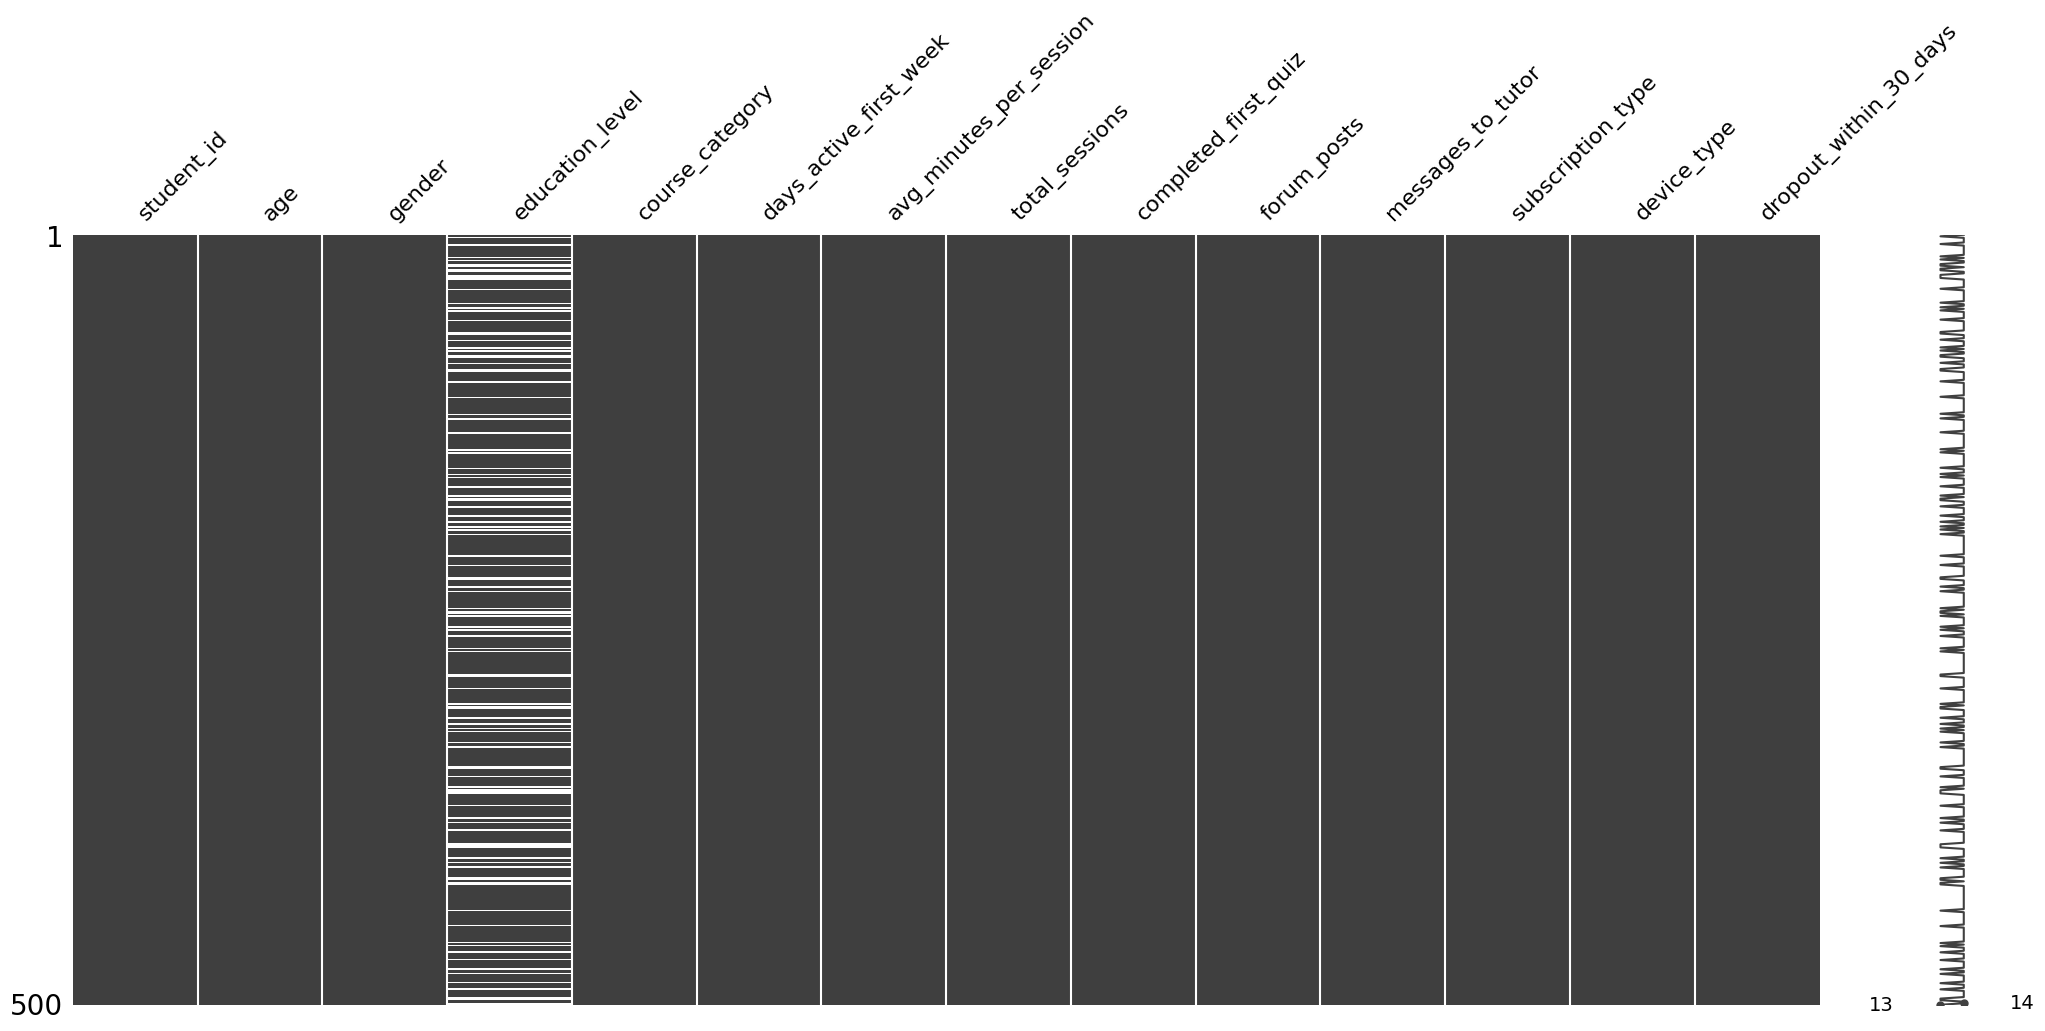


Visualização de barras de ausência:


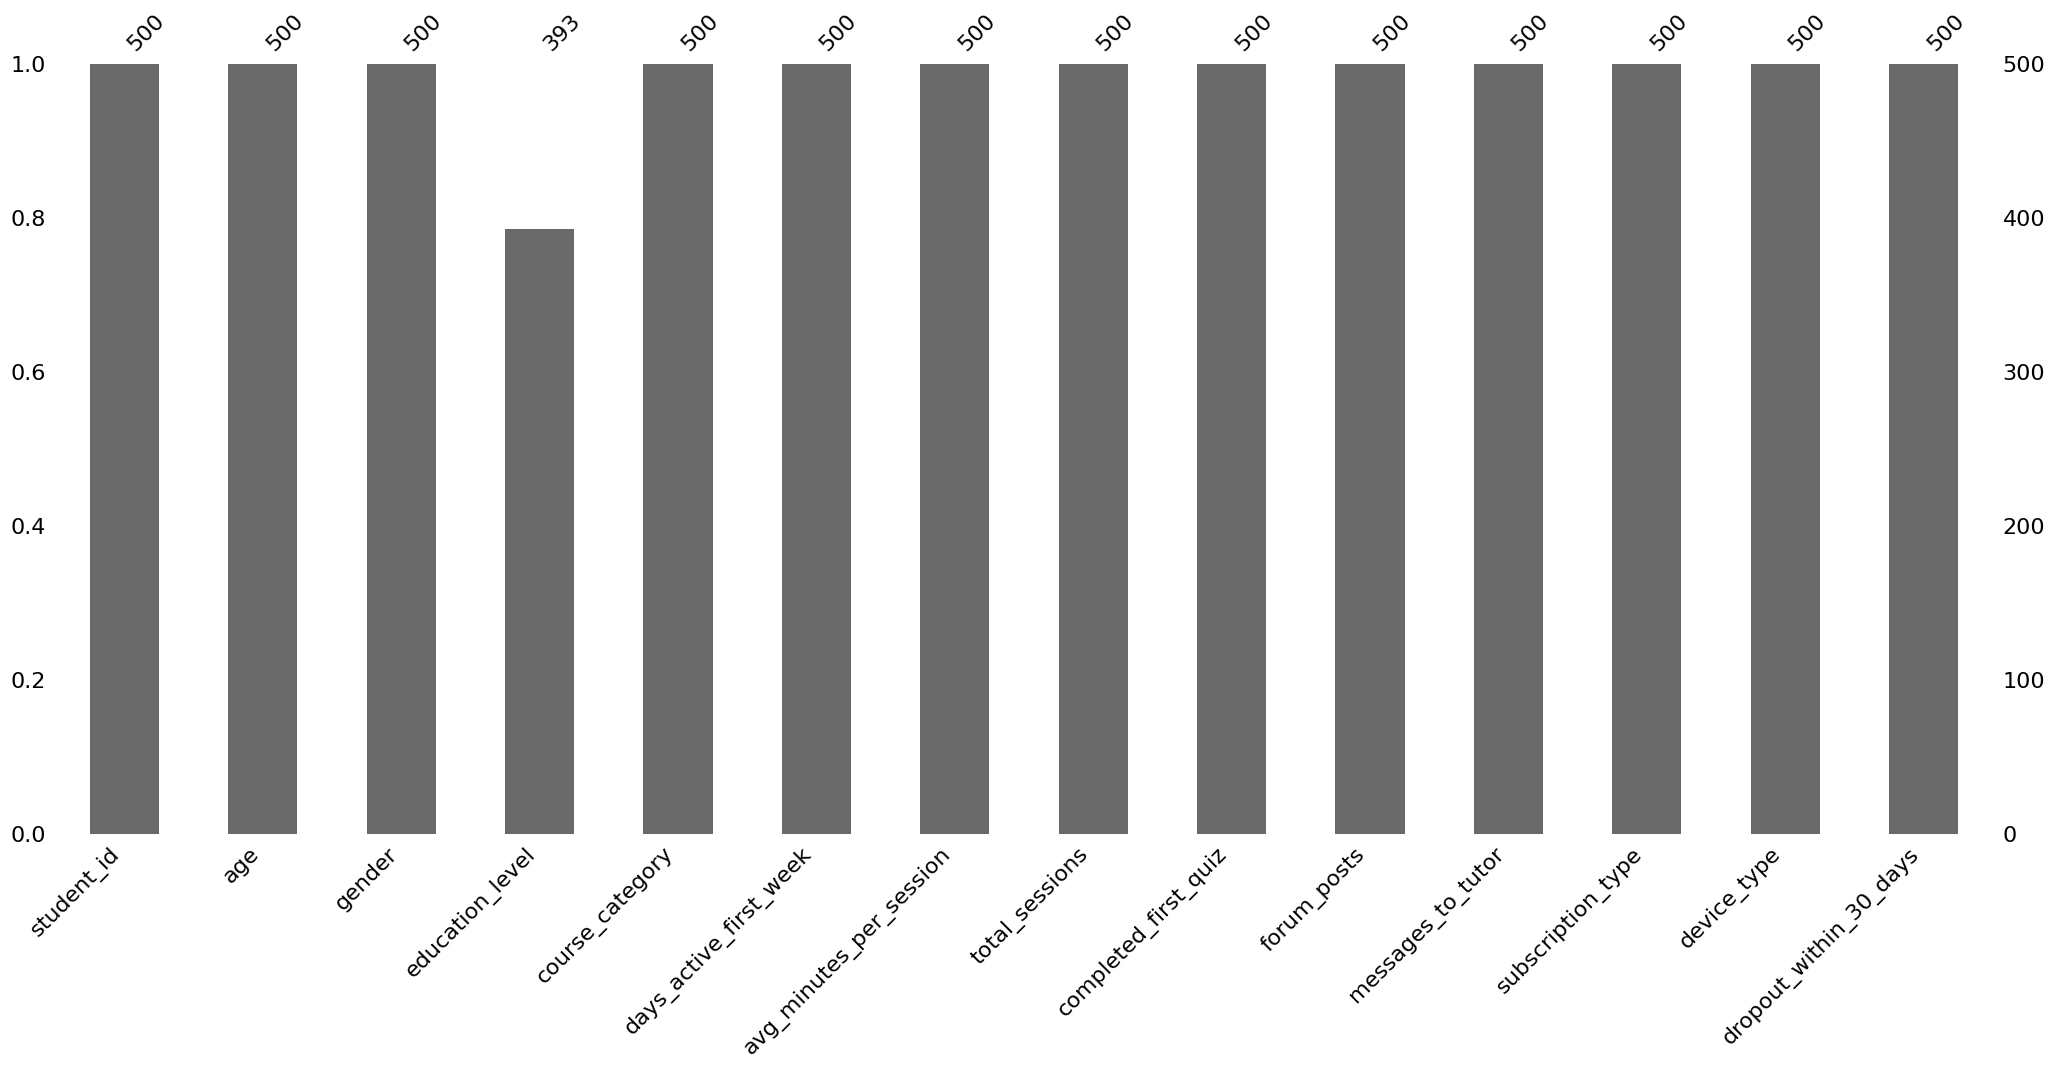

In [ ]:
!pip install missingno
import missingno as msno

# Gráfico de matriz de ausência
print("\nVisualização de matriz de ausência:")
msno.matrix(df)
plt.show() # Adicionado para garantir que o gráfico apareça

# Gráfico de barras de ausência
print("\nVisualização de barras de ausência:")
msno.bar(df)
plt.show()

# Linhas brancas no gráfico indicam ausência de dados

### **O que os Gráficos nos diz:**

- **Matriz de Ausência:**
Ao observar a matriz, podemos ver uma representação de toda a nossa tabela. Cada linha horizontal clara na coluna que representa `education_level` indica um aluno para o qual essa informação está faltando. As outras colunas aparecem como blocos sólidos, indicando que estão completas.

- **Gráfico de Barras de Ausência:**
Este gráfico mostra uma barra para cada coluna. A altura da barra indica quão "cheia" de dados está a coluna. Podemos ver que a barra correspondente à coluna `education_level` é visivelmente menor que as outras, confirmando que é a única com uma quantidade significativa de dados faltantes.

# **Verificação da Coluna 'Education_Level'**

Anteriormente, descobrimos que a informação sobre o nível de escolaridade (`education_level`) está faltando para 107 dos nossos 500 alunos. Antes de decidirmos como lidar com essa ausência, é importante entender quais são os níveis de escolaridade presentes nos dados e quantos alunos se enquadram em cada um.

O código a seguir nos ajuda a fazer exatamente isso:
1.  Ele conta quantos alunos pertencem a cada categoria de `education_level` (como "High School", "Graduate", etc.).
2.  Crucialmente, ele também conta quantos alunos têm essa informação como "NaN" (Not a Number), que é como o sistema marca os dados ausentes.
3.  Por fim, gera um gráfico de barras para visualizarmos essas contagens.


Valores únicos e contagens para 'education_level':
education_level
High School      136
Graduate         129
Undergraduate    128
NaN              107
Name: count, dtype: int64

Visualização da distribuição de 'education_level' (incluindo ausentes):


<ipython-input-13-930e4e9a1cf3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette="viridis", order=education_counts.index) # Mantém a ordem original


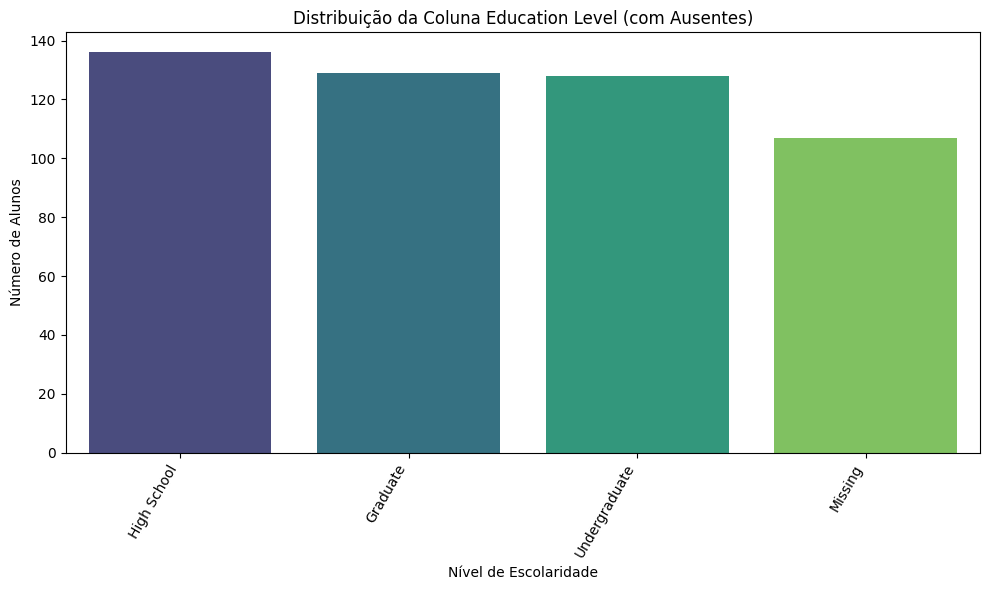

In [ ]:
# Verificar os valores únicos e suas contagens para 'education_level'
print("Valores únicos e contagens para 'education_level':")
print(df['education_level'].value_counts(dropna=False)) # dropna=False inclui a contagem de NaNs

print("\nVisualização da distribuição de 'education_level' (incluindo ausentes):")
# Contar a frequência de cada categoria, incluindo NaN como uma categoria separada para visualização
education_plot = df['education_level'].fillna('Missing')  # Substitui NaN por 'Missing' para visualização
education_counts = education_plot.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette="viridis", order=education_counts.index) # Mantém a ordem original
plt.title('Distribuição da Coluna Education Level (com Ausentes)')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=60, ha='right') # Rotaciona os rótulos para melhor leitura
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

**Interpretação do Gráfico:** Este gráfico nos mostra que, além dos 107 alunos com informação de escolaridade ausente (NaN) convetidos para Missing, temos três categorias principais:*
* *`High School` (Ensino Médio): 136 alunos*
* *`Graduate` (Pós-Graduado(a) / Formado(a)): 129 alunos*
* *`Undergraduate` (Graduando(a) / Universitário): 128 alunos*

*O gráfico de barras nos dá uma representação visual clara dessas contagens. Podemos ver as alturas das barras para "High School", "Graduate", e "Undergraduate" lado a lado, e também uma barra representando declarad 'Missing' que representa os "Nan" (Dados ausentes), que corresponde aos 107 alunos com dados ausentes.*


# **Tratamento de Dados Ausentes**

Identificamos que a coluna education_level (Nível de Escolaridade) tinha 107 informações faltando. Deixar esses "buracos" nos dados não é ideal. Portanto, nesta etapa, tomamos uma decisão sobre como lidar com eles.

## **Estratégia Utilizada**:
Foi decidido preencher todos os campos vazios na coluna `education_level` com a etiqueta `"Não Informado"`. Por que fizemos isso?

- **Preservar Dados:** Não queríamos simplesmente apagar os 107 alunos para os quais não tínhamos essa informação, pois perderíamos outros dados valiosos sobre eles.

- **Informação Potencial:** A própria ausência de informação sobre o nível de escolaridade pode ser um dado relevante. Ao criar uma categoria "Não Informado", permitimos que nossa análise futura (e o modelo de machine learning) considere se essa característica está associada à evasão.

In [ ]:
# Imputar os valores ausentes em 'education_level' com 'Não Informado'
df['education_level'].fillna('Não Informado', inplace=True)

# Verificar novamente os valores únicos e suas contagens para 'education_level'
print("Valores únicos e contagens para 'education_level' APÓS IMPUTAÇÃO:")
print(df['education_level'].value_counts(dropna=False))

# Verificar novamente a contagem de valores ausentes em todo o DataFrame
print("\nContagem de valores ausentes por coluna APÓS IMPUTAÇÃO:")
missing_values_after = df.isnull().sum()
print(missing_values_after[missing_values_after > 0]) # Mostrar apenas colunas que ainda têm ausentes

if missing_values_after.sum() == 0:
    print("\nTodos os valores ausentes foram tratados no DataFrame!")
else:
    print("\nAinda existem valores ausentes em algumas colunas.")

Valores únicos e contagens para 'education_level' APÓS IMPUTAÇÃO:
education_level
High School      136
Graduate         129
Undergraduate    128
Não Informado    107
Name: count, dtype: int64

Contagem de valores ausentes por coluna APÓS IMPUTAÇÃO:
Series([], dtype: int64)

Todos os valores ausentes foram tratados no DataFrame!


<ipython-input-14-bae0010adfe8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education_level'].fillna('Não Informado', inplace=True)


*Como podemos ver, a categoria "Não Informado" agora aparece na lista com 107 alunos, que é exatamente o número de dados que estavam faltando. As outras categorias ("High School", "Graduate", "Undergraduate") mantiveram suas contagens originais.*

# **Analisando as Características Numéricas dos Alunos: Médias, Variações e Valores Extremos**

Com os dados ausentes já tratados na etapa anterior, nosso próximo passo é mergulhar nas características dos alunos que são representadas por números. O objetivo aqui é duplo:
1.  Entender os **valores típicos** para cada característica (como a idade média, a média de minutos que passam na plataforma, etc.).
2.  Identificar visualmente se existem **valores muito fora do comum** (os chamados "outliers" ou valores extremos), que poderiam ser, por exemplo, um aluno com uma idade muito avançada ou um número de acessos excepcionalmente alto.

Para isso, o código que executamos realiza duas tarefas principais:
* **Primeiro**, ele calcula um **resumo estatístico** para cada coluna numérica. Este resumo nos dá uma visão geral dos dados, incluindo médias, valores mínimos e máximos, e como os dados se distribuem.
* **Segundo**, ele cria gráficos conhecidos como **"boxplots"**. Cada boxplot é como um "raio-X" de uma coluna numérica, mostrando de forma visual a concentração dos dados e se há valores muito discrepantes.


In [ ]:
# Selecionar colunas numéricas para análise de outliers
numerical_cols = ['age', 'days_active_first_week', 'avg_minutes_per_session',
                  'total_sessions', 'completed_first_quiz', 'forum_posts', 'messages_to_tutor']

# Estatísticas descritivas
print("Estatísticas Descritivas das Colunas Numéricas:")
print(df[numerical_cols].describe())

Estatísticas Descritivas das Colunas Numéricas:
              age  days_active_first_week  avg_minutes_per_session  \
count  500.000000              500.000000               500.000000   
mean    38.116000                3.386000                30.348080   
std     12.733217                2.278461                16.794079   
min     16.000000                0.000000                 2.020000   
25%     27.000000                1.000000                15.182500   
50%     39.000000                3.000000                30.275000   
75%     48.000000                5.000000                45.295000   
max     59.000000                7.000000                59.830000   

       total_sessions  completed_first_quiz  forum_posts  messages_to_tutor  
count      500.000000            500.000000   500.000000         500.000000  
mean        15.170000              0.392000     1.208000           0.468000  
std          8.581164              0.488686     1.114999           0.676677  
min      

## **Sobre a tebela acima**

* **`age` (idade):** A idade média (`mean`) dos alunos é de aproximadamente 38 anos. O aluno mais novo (`min`) tem 16 anos e o mais velho (`max`) tem 59. Metade dos alunos (`50%` ou mediana) tem 39 anos ou menos.
* **`avg_minutes_per_session` (média de minutos por sessão):** Em média, os alunos passam cerca de 30 minutos por sessão.
* **`total_sessions` (total de sessões):** O número médio de sessões é de aproximadamente 15.
* Observando a diferença entre o valor do "75%" e o "max" em algumas colunas, já podemos suspeitar da presença de alguns valores mais altos que o comum.



Boxplots das Colunas Numéricas:


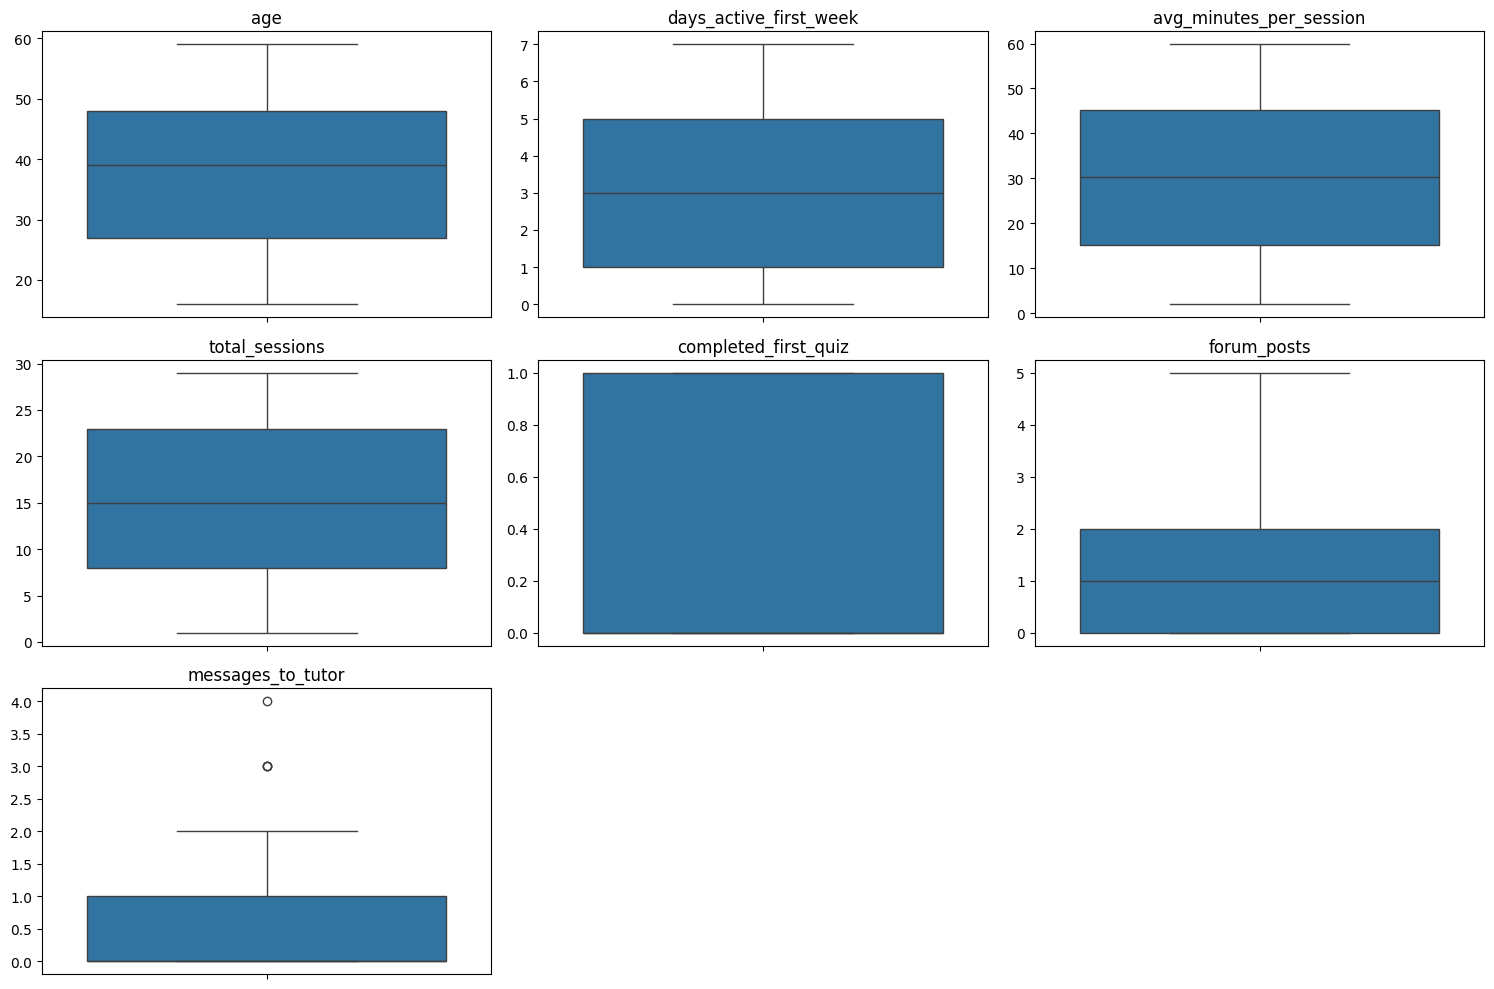

In [ ]:
# Visualização de boxplots para identificar outliers
print("\nBoxplots das Colunas Numéricas:")
plt.figure(figsize=(15, 10)) # Ajuste o tamanho conforme necessário
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Cria uma grade de subplots (3 linhas, 3 colunas)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('') # Remove o rótulo y duplicado
plt.tight_layout()
plt.show()

##  **Visualizando a Dispersão dos Dados: Boxplots**

Os boxplots abaixo nos ajudam a enxergar a distribuição de cada característica numérica e a identificar visualmente esses possíveis valores extremos.

**Interpretando os Boxplots:**
* Cada "caixinha" colorida representa uma característica.
* A **caixa em si** mostra onde se concentra a maioria dos alunos (os 50% centrais).
* A **linha no meio da caixa** é a mediana (o valor que divide os alunos ao meio).
* As **"hastes"** que se estendem da caixa indicam a variação normal dos dados.
* **Pontinhos individuais que aparecem fora dessas hastes** são os chamados "outliers" – valores que se destacam por serem muito mais altos (ou, em outros casos, muito mais baixos) que o restante.

**O que os gráficos nos mostram (antes de qualquer tratamento para outliers):**
* **`age` (idade):** Alguns alunos aparecem com idades mais avançadas, um pouco distantes do grupo principal.
* **`avg_minutes_per_session` (média de minutos por sessão):** Vemos alguns alunos com uma média de tempo por sessão consideravelmente alta.
* **`total_sessions` (total de sessões):** Alguns alunos se destacam com um número total de sessões bem acima da média.
* **`forum_posts` (posts no fórum) e `messages_to_tutor` (mensagens ao tutor):** Também mostram alguns alunos com atividade bem mais intensa (mais posts ou mensagens) do que a maioria.
* As colunas `days_active_first_week` e `completed_first_quiz` (que na verdade representa "sim" ou "não") não mostram outliers desta forma, pois seus valores são mais limitados.

Esta análise visual e numérica dos outliers é um passo importante. Valores muito extremos podem distorcer nossas análises e os resultados dos modelos de previsão que construiremos. Portanto, a próxima etapa será decidir uma estratégia para lidar com esses outliers de forma apropriada.

# **Entendendo o Formato das Distribuições Numéricas**

Após identificarmos nos boxplots que algumas características numéricas possuem valores extremos (outliers), o próximo passo é visualizar o "formato" da distribuição de cada uma delas. Isso nos ajuda a entender melhor como os dados se comportam e a escolher a estratégia mais adequada para lidar com os outliers.

Para isso, o código a seguir gera **histogramas** para as colunas que mostraram potenciais outliers: `age` (idade), `avg_minutes_per_session` (média de minutos por sessão), `total_sessions` (total de sessões), `forum_posts` (posts no fórum) e `messages_to_tutor` (mensagens ao tutor).
* Um **histograma** é um gráfico de barras que mostra a frequência com que diferentes faixas de valores aparecem.
* Junto com o histograma, uma linha suave chamada **KDE (Estimativa de Densidade do Kernel)** é desenhada para nos dar uma ideia mais clara da forma da distribuição.

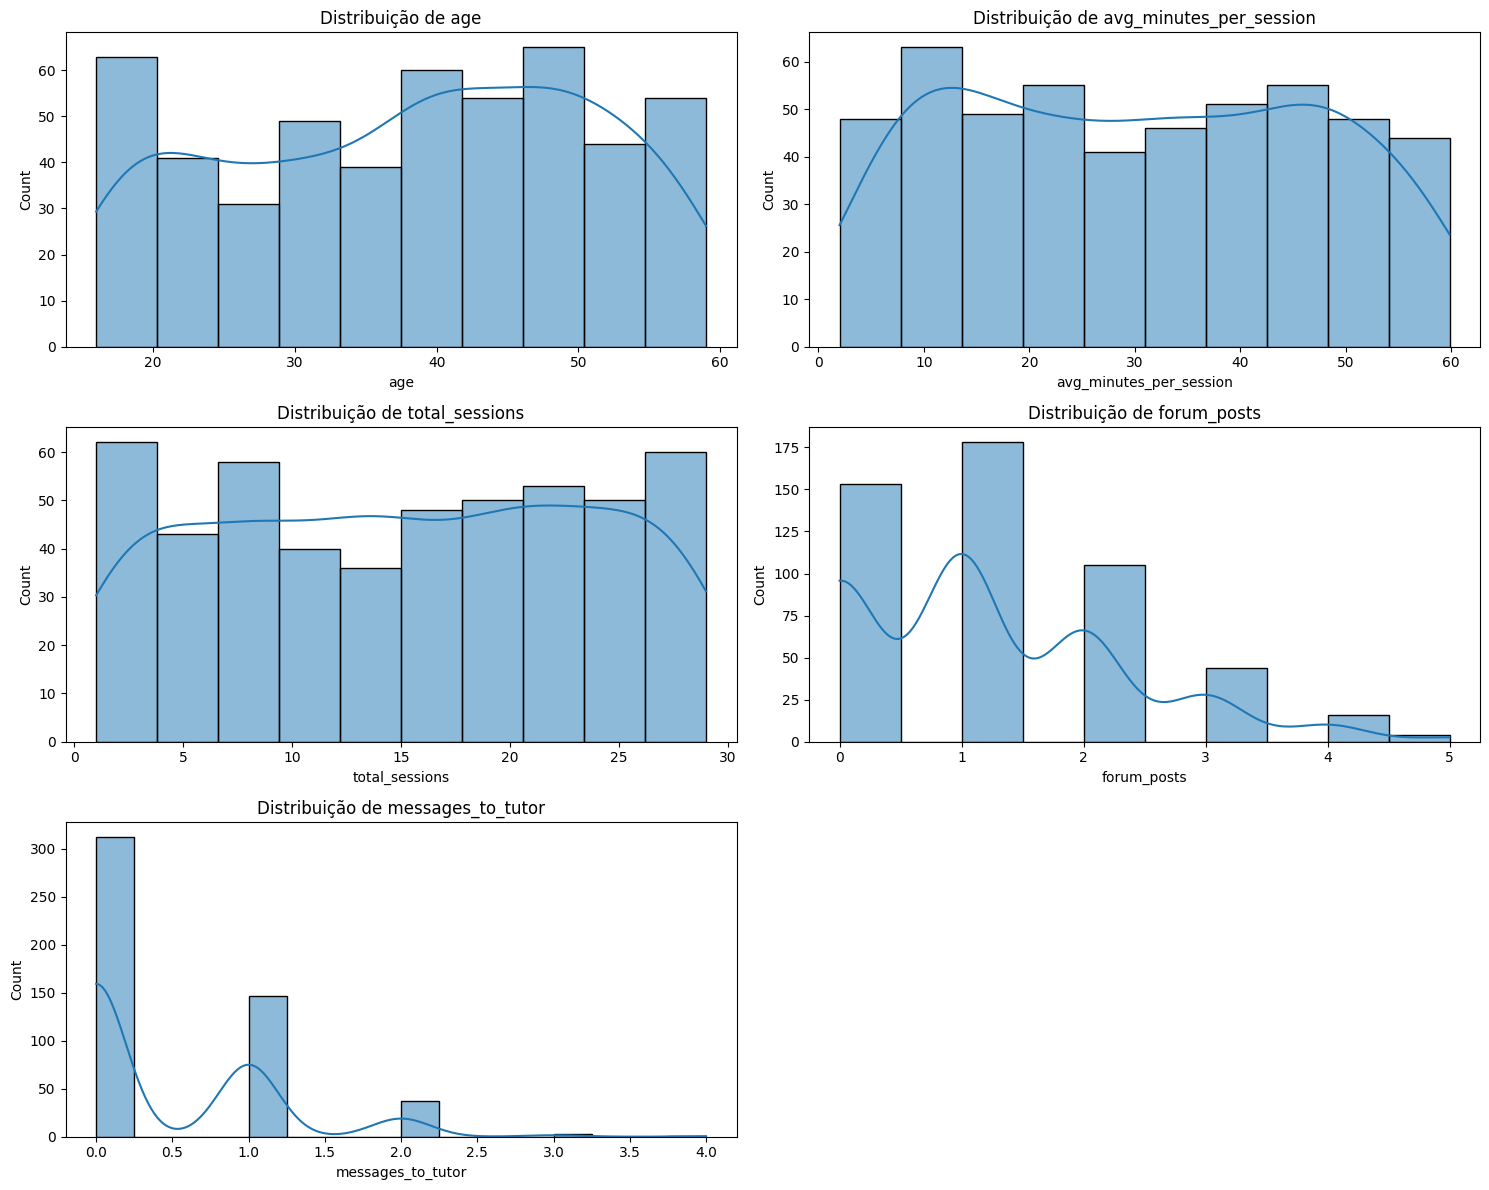

In [ ]:
# Colunas com possiveis outliers
cols_to_plot_dist = ['age', 'avg_minutes_per_session', 'total_sessions', 'forum_posts', 'messages_to_tutor']

plt.figure(figsize=(15, 12)) # Ajuste o tamanho conforme necessário
for i, col in enumerate(cols_to_plot_dist):
    plt.subplot(3, 2, i + 1) # Cria uma grade de subplots
    sns.histplot(df[col], kde=True) # kde=True adiciona uma estimativa de densidade do kernel
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

## **O que é possível perceber nos Gráficos**

Ao analisar os histogramas gerados (representados na imagem acima), podemos notar o seguinte sobre cada característica:

* **`age` (idade):** A distribuição das idades parece um pouco achatada ou com vários "picos" (multimodal), mas não demonstra uma inclinação (assimetria) muito forte para um lado ou para o outro. Os valores mais altos que vimos como outliers nos boxplots não criam uma "cauda" longa e óbvia neste gráfico.
* **`avg_minutes_per_session` (média de minutos por sessão):** Esta distribuição mostra uma clara **inclinação para a direita** (assimetria à direita). Isso significa que a maioria dos alunos tem médias de tempo por sessão mais baixas, e há um número menor de alunos com médias de tempo significativamente mais altas, formando uma "cauda" que se estende para a direita.
* **`total_sessions` (total de sessões):** Assim como a média de minutos por sessão, o total de sessões também exibe uma **assimetria à direita**. Muitos alunos têm um número menor de sessões, e poucos alunos têm um número muito alto.
* **`forum_posts` (posts no fórum):** Sendo uma contagem, esta distribuição é **fortemente assimétrica à direita**. A grande maioria dos alunos faz poucos posts (0, 1 ou 2), e um número muito pequeno de alunos faz mais posts.
* **`messages_to_tutor` (mensagens ao tutor):** Similar aos posts no fórum, esta é outra contagem com **forte assimetria à direita**. A maioria dos alunos envia poucas ou nenhuma mensagem ao tutor.

Entender essas formas, especialmente a assimetria, é importante. Por exemplo, dados muito assimétricos podem justificar o uso de transformações (como a logarítmica) ou de técnicas de tratamento de outliers como o "capping" (limitação), que foi a que escolhemos para as colunas mais afetadas.

# **Lidando com Valores Extremos (Outliers), técnica de "Capping"**

Nas etapas anteriores, identificamos que algumas características numéricas dos alunos (como idade, tempo médio por sessão, etc.) possuíam valores muito altos para um pequeno grupo de alunos – os chamados "outliers". Esses valores extremos podem, às vezes, distorcer nossas análises ou impactar negativamente o desempenho dos modelos de previsão que construiremos.

Para mitigar esse efeito, decidimos aplicar uma técnica chamada **"capping"** (ou limitação).

**O que é o Capping?**

Imagine que temos uma régua e queremos que todos os valores fiquem dentro de certos limites. Para o capping:
1.  Primeiro, definimos um "teto" para cada característica. Neste caso, escolhemos o **percentil 95** como nosso teto. Isso significa que olhamos para todos os valores daquela característica e encontramos o ponto onde 95% dos alunos estão abaixo dele e apenas 5% estão acima.
2.  Depois, qualquer valor que estiver acima desse "teto" (o valor do percentil 95) é substituído pelo próprio valor do teto.

Por exemplo, se para a coluna "idade" o valor do percentil 95 for 57 anos, qualquer aluno com idade acima de 57 anos (seja 58, 59, ou mais) terá sua idade ajustada para 57 nesta etapa. _(Lembrete: posteriormente, decidimos não aplicar capping na coluna 'idade' para preservar seus valores originais, mas o princípio é o mesmo para as outras colunas onde o capping foi mantido)_.

O código a seguir aplica essa técnica às colunas que selecionamos e nos mostra os resultados.

Aplicando capping no percentil 95.0%:

Para a coluna 'age', o valor do 95.0º percentil é: 57.00
Para a coluna 'avg_minutes_per_session', o valor do 95.0º percentil é: 57.27
Para a coluna 'total_sessions', o valor do 95.0º percentil é: 28.00
Para a coluna 'forum_posts', o valor do 95.0º percentil é: 3.00
Para a coluna 'messages_to_tutor', o valor do 95.0º percentil é: 2.00

Estatísticas Descritivas APÓS Capping:
              age  avg_minutes_per_session  total_sessions  forum_posts  \
count  500.000000               500.000000      500.000000   500.000000   
mean    38.044000                30.278720       15.134000     1.160000   
std     12.620325                16.678645        8.524869     1.002202   
min     16.000000                 2.020000        1.000000     0.000000   
25%     27.000000                15.182500        8.000000     0.000000   
50%     39.000000                30.275000       15.000000     1.000000   
75%     48.000000                45.295000       23.000000  

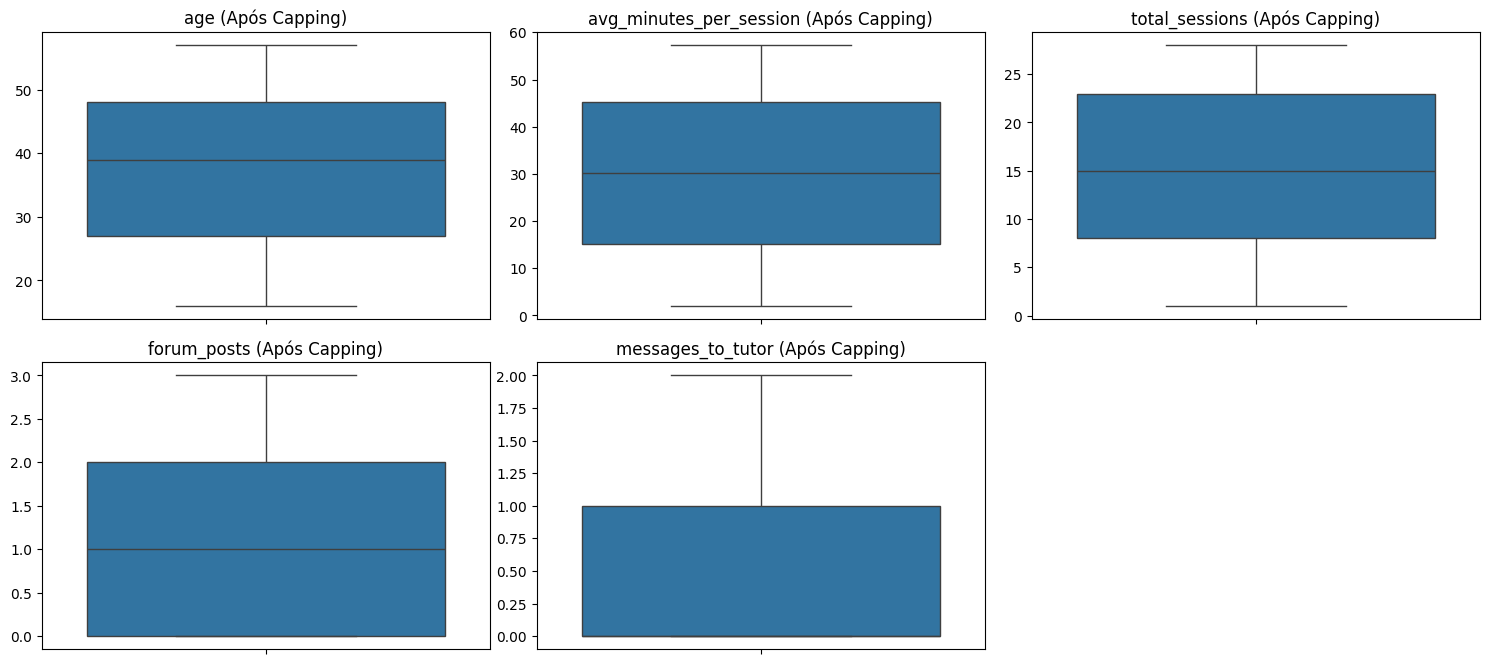

In [ ]:
cols_to_cap = ['age', 'avg_minutes_per_session', 'total_sessions', 'forum_posts', 'messages_to_tutor']
percentile_to_cap = 0.95 # Vamos usar o percentil 95

print(f"Aplicando capping no percentil {percentile_to_cap*100}%:\n")

for col in cols_to_cap:
    # Calcular o valor do percentil
    cap_value = df[col].quantile(percentile_to_cap)
    print(f"Para a coluna '{col}', o valor do {percentile_to_cap*100}º percentil é: {cap_value:.2f}")

    # Aplicar o capping (substituir valores acima do cap_value pelo cap_value)
    # Usaremos np.where para esta operação
    df[col] = np.where(df[col] > cap_value, cap_value, df[col])

print("\nEstatísticas Descritivas APÓS Capping:")
print(df[cols_to_cap].describe())

# Opcional: Visualizar boxplots novamente para ver o efeito
print("\nBoxplots APÓS Capping:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_cap): # Usar cols_to_cap aqui
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} (Após Capping)')
    plt.ylabel('')
plt.tight_layout()
plt.show()

*Esta saída nos mostra qual foi o valor "teto" calculado para cada característica. Por exemplo, para `avg_minutes_per_session`, qualquer valor acima de 57.27 minutos foi ajustado para 57.27.*

*Observando a linha `max` (valor máximo) nesta nova tabela, podemos ver que os valores máximos para as colunas que sofreram capping agora correspondem exatamente aos valores do percentil 95 que calculamos. Por exemplo, o `max` de `avg_minutes_per_session` agora é 57.27. Isso confirma que o capping foi aplicado.*
*As médias (`mean`) e desvios padrão (`std`) também podem ter mudado sutilmente, pois os valores mais extremos foram ajustados.*

---
**Visualizando os Boxplots *APÓS* o Capping:**

*Ao compararmos estes novos boxplots com os anteriores (antes do capping), notamos que os "pontinhos" individuais que representavam os outliers mais altos agora desapareceram ou estão bem mais próximos das "hastes" dos boxplots. As distribuições parecem mais "comprimidas" no limite superior, pois os valores extremos foram trazidos para dentro do limite do percentil 95.*

Essa técnica de capping nos ajuda a ter um conjunto de dados mais estável para as próximas etapas, reduzindo a influência desproporcional que valores muito extremos poderiam ter.

# **Verificação de Duplicatas e inconsistências das Categorias.**

Depois de tratar os dados ausentes e os valores extremos (outliers), é importante realizar mais algumas verificações nos dados. Nesta etapa, focamos em duas coisas:

- **Linhas Duplicadas:** Queremos saber se existem alunos cujas informações aparecem repetidas de forma idêntica na nossa tabela. Ter dados duplicados pode levar a análises incorretas.

- **Consistência das Categorias:** Para as colunas que contêm texto (categorias), como gender (gênero) ou course_category (categoria do curso), precisamos verificar se os valores estão padronizados. Por exemplo, não queremos ter "Masculino", "masculino" e "M" como três categorias diferentes se todas significam a mesma coisa.

In [ ]:
# 2. Verificar Linhas Duplicadas
duplicate_rows = df.duplicated().sum()
print(f"Número de linhas duplicadas no dataset: {duplicate_rows}")

# Se houver duplicatas, você pode querer visualizá-las ou removê-las
if duplicate_rows > 0:
    print("Exemplo de linhas duplicadas (se houver):")
    print(df[df.duplicated(keep=False)]) # keep=False marca todas as duplicatas como True
    # Para remover: df.drop_duplicates(inplace=True) - decidir após análise

print("\n--- Análise de Consistência em Variáveis Categóricas ---")
categorical_cols_to_check = ['gender', 'course_category', 'subscription_type', 'device_type']

for col in categorical_cols_to_check:
    print(f"\nValores únicos e contagens para '{col}':")
    print(df[col].value_counts(dropna=False))

Número de linhas duplicadas no dataset: 0

--- Análise de Consistência em Variáveis Categóricas ---

Valores únicos e contagens para 'gender':
gender
Female    245
Male      208
Other      47
Name: count, dtype: int64

Valores únicos e contagens para 'course_category':
course_category
Languages    133
Business     132
Tech         118
Design       117
Name: count, dtype: int64

Valores únicos e contagens para 'subscription_type':
subscription_type
Free    351
Paid    149
Name: count, dtype: int64

Valores únicos e contagens para 'device_type':
device_type
Tablet     172
Mobile     167
Desktop    161
Name: count, dtype: int64


**Sobre o Output Gerado**

Os dados passaram bem por estas verificações de integridade. *Não encontramos duplicatas* e as categorias dentro das colunas analisadas parecem estar consistentes e *sem erros óbvios de digitação ou variações* que precisariam de correção neste momento.



# **Limpeza Inicial dos Dados**

Antes de traduzirmos qualquer informação ou realizar análises mais profundas, é essencial realizar uma limpeza inicial nos dados. Esta etapa garante que os problemas mais comuns, como informações faltando ou valores numéricos muito extremos, sejam tratados.

O código a seguir realiza as seguintes ações de limpeza e preparação:

1.  **Tratamento de Dados Ausentes em `education_level`:** Preenchemos os campos vazios na coluna `education_level` (nível de escolaridade) com o texto "Não Informado". Isso garante que não tenhamos "buracos" nessa coluna.
2.  **Controle de Valores Extremos (Outliers) - "Capping":** Para algumas colunas numéricas (`avg_minutes_per_session`, `total_sessions`, `forum_posts`, `messages_to_tutor`), identificamos anteriormente que existiam alguns valores muito altos (outliers). Aqui, aplicamos uma técnica chamada "capping" (limitação):
    * Calculamos um valor "teto" (o percentil 95) para cada uma dessas colunas.
    * Qualquer valor original que estivesse acima desse teto foi substituído pelo próprio valor do teto. Isso ajuda a reduzir o impacto de valores muito extremos sem eliminá-los completamente.
    * **Importante:** Decidimos *não* aplicar este capping à coluna `age` (idade) para manter seus valores originais, como 58 ou 59 anos.
3.  **Arredondamento:** A coluna `avg_minutes_per_session` (média de minutos por sessão), que contém números decimais, foi arredondada para ter apenas duas casas decimais, facilitando a leitura.
4.  **Ajuste de Tipos Numéricos:** Algumas colunas que representam contagens (como `total_sessoes`, `forum_posts`, etc.) ou idades foram convertidas para o tipo de dado "inteiro", pois não faz sentido terem casas decimais após os tratamentos.


In [ ]:
print("\n--- Iniciando Limpeza Inicial Essencial ---")

# 1. Tratar dados ausentes em 'education_level'
if 'education_level' in df.columns:
    df['education_level'].fillna('Não Informado', inplace=True)
    print("Valores ausentes em 'education_level' preenchidos com 'Não Informado'.")
else:
    print("Coluna 'education_level' não encontrada para imputação de ausentes.")

# 2. Capping de outliers
cols_to_cap = ['avg_minutes_per_session', 'total_sessions', 'forum_posts', 'messages_to_tutor']
percentile_to_cap = 0.95

print(f"\nAplicando capping no percentil {percentile_to_cap*100}%:")
for col in cols_to_cap:
    if col in df.columns:
        cap_value = df[col].quantile(percentile_to_cap)
        df[col] = np.where(df[col] > cap_value, cap_value, df[col])
        print(f"Capping aplicado à coluna '{col}' com valor {cap_value:.2f}.")
    else:
        print(f"Coluna '{col}' não encontrada para capping.")

# 3. Arredondar 'avg_minutes_per_session' para 2 casas decimais
if 'avg_minutes_per_session' in df.columns:
    df['avg_minutes_per_session'] = df['avg_minutes_per_session'].round(2)
    print("Coluna 'avg_minutes_per_session' arredondada para 2 casas decimais.")


cols_para_serem_int_apos_cap = ['age', 'total_sessions', 'forum_posts', 'messages_to_tutor', 'days_active_first_week']
for col in cols_para_serem_int_apos_cap:
    if col in df.columns and not df[col].isnull().any(): # Só converte se não houver NaNs
        try:
            df[col] = df[col].astype(float).astype(int) # Primeiro para float, depois para int
            print(f"Coluna '{col}' convertida para int após capping.")
        except ValueError:
            print(f"Não foi possível converter '{col}' para int, pode conter NaNs ou valores não numéricos.")
    elif col in df.columns and df[col].isnull().any():
        print(f"Coluna '{col}' contém NaNs, não convertida para int automaticamente.")


print("\n--- DataFrame após Limpeza Inicial Essencial ---")
print(df.head())
df.info()


--- Iniciando Limpeza Inicial Essencial ---
Valores ausentes em 'education_level' preenchidos com 'Não Informado'.

Aplicando capping no percentil 95.0%:
Capping aplicado à coluna 'avg_minutes_per_session' com valor 57.27.
Capping aplicado à coluna 'total_sessions' com valor 28.00.
Capping aplicado à coluna 'forum_posts' com valor 3.00.
Capping aplicado à coluna 'messages_to_tutor' com valor 2.00.
Coluna 'avg_minutes_per_session' arredondada para 2 casas decimais.
Coluna 'age' convertida para int após capping.
Coluna 'total_sessions' convertida para int após capping.
Coluna 'forum_posts' convertida para int após capping.
Coluna 'messages_to_tutor' convertida para int após capping.
Coluna 'days_active_first_week' convertida para int após capping.

--- DataFrame após Limpeza Inicial Essencial ---
  student_id  age  gender education_level course_category  \
0      S0000   54  Female        Graduate          Design   
1      S0001   44  Female   Não Informado            Tech   
2      S00

<ipython-input-6-29acd13793ea>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education_level'].fillna('Não Informado', inplace=True)


**Sobre o Output:**
Confirma que todas as colunas agora têm 500 valores não nulos, indicando que não há mais dados faltantes. Também vemos que os tipos de dados (`Dtype`) para colunas como `age`, `total_sessoes`, etc., estão como `int64` (números inteiros), e `avg_minutes_per_session` como `float64` (número decimal), conforme esperado após nossos tratamentos.*

Com esta limpeza inicial concluída, nosso conjunto de dados está mais robusto e preparado para as etapas seguintes de tradução e análise mais detalhada.

# **Traduções e Re-rotulagens**

Após a limpeza inicial (tratamento de dados ausentes e outliers), o próximo passo é tornar nosso conjunto de dados mais amigável e fácil de entender. Para isso, realizamos algumas transformações importantes:

1.  **Nomes das Colunas em Português:** Todos os nomes das colunas que estavam em inglês (como `age`, `gender`, `course_category`) foram traduzidos para o português (como `idade`, `genero`, `categoria_curso`). Isso facilita a leitura e interpretação para quem fala português.
2.  **Valores das Categorias em Português:** Para colunas que contêm categorias de texto (como `education_level`, `course_category`, `gender`, `subscription_type`), traduzimos os valores internos do inglês para o português. Por exemplo, "High School" virou "Ensino Médio", "Female" virou "Feminino", e "Free" virou "Grátis".
3.  **Rótulos Descritivos para Dados Binários:** Colunas que usavam números (0 e 1) para representar uma resposta de sim/não (como `completed_first_quiz` e nossa variável alvo `dropout_within_30_days`) foram re-rotuladas para terem textos descritivos. Por exemplo, para `completed_first_quiz`, 0 virou "Não Concluiu" e 1 virou "Concluiu". Para `dropout_within_30_days`, 0 virou "Não Evadiu" e 1 virou "Evadiu".

O código a seguir aplica todas essas transformações e depois nos mostra um resumo para confirmarmos que tudo ocorreu como esperado.

In [ ]:
print("\n--- Iniciando Traduções e Re-rotulagens ---")

# 1. TRADUZIR NOMES DAS COLUNAS (usando os nomes originais como chaves)
mapa_nomes_colunas = {
    'age': 'idade',
    'gender': 'genero',
    'education_level': 'nivel_educacional', # Chave é o nome original
    'course_category': 'categoria_curso',   # Chave é o nome original
    'days_active_first_week': 'dias_ativo_primeira_semana',
    'avg_minutes_per_session': 'media_minutos_por_sessao',
    'total_sessions': 'total_sessoes',
    'completed_first_quiz': 'concluiu_primeiro_quiz', # Chave é o nome original
    'forum_posts': 'posts_forum',
    'messages_to_tutor': 'mensagens_tutor',
    'subscription_type': 'tipo_assinatura', # Chave é o nome original
    'device_type': 'tipo_dispositivo',
    'dropout_within_30_days': 'evadiu_30_dias' # Chave é o nome original
}
df.rename(columns=mapa_nomes_colunas, inplace=True)
print("Nomes das colunas traduzidos.")

# --- Mapeamento de Valores ---
# 2. Traduzir Valores em 'nivel_educacional' (novo nome da coluna)
mapa_nivel_educacional = {
    "High School": "Ensino Médio",
    "Graduate": "Pós-graduado(a)",
    "Undergraduate": "Graduando(a)",
    "Não Informado": "Não Informado" # Este valor foi imputado no Passo 2
}
if 'nivel_educacional' in df.columns:
    df['nivel_educacional'] = df['nivel_educacional'].replace(mapa_nivel_educacional)
    print("Valores em 'nivel_educacional' traduzidos.")

# 3. Traduzir Valores em 'categoria_curso' (novo nome da coluna)
mapa_categoria_curso = {
    "Languages": "Idiomas",
    "Business": "Negócios",
    "Tech": "Tecnologia",
    "Design": "Design" # Importante adicionar todas as categorias originais
}
if 'categoria_curso' in df.columns:
    df['categoria_curso'] = df['categoria_curso'].replace(mapa_categoria_curso)
    print("Valores em 'categoria_curso' traduzidos.")

# 4. Traduzir valores na coluna 'genero' (novo nome da coluna)
mapa_genero = {
    "Female": "Feminino",
    "Male": "Masculino",
    "Other": "Outro"
}
if 'genero' in df.columns:
     df['genero'] = df['genero'].replace(mapa_genero)
     print("Valores em 'genero' traduzidos.")

# 5. Re-rotular 'tipo_assinatura' (novo nome da coluna)
mapa_tipo_assinatura = {
    "Free": "Grátis",
    "Paid": "Pago"
}
if 'tipo_assinatura' in df.columns:
    df['tipo_assinatura'] = df['tipo_assinatura'].replace(mapa_tipo_assinatura)
    print("Valores em 'tipo_assinatura' re-rotulados.")

# 6. Re-rotular 'concluiu_primeiro_quiz' (novo nome da coluna)
# A coluna deve ser int (0,1) neste ponto devido ao Passo 2 ou carregamento original
mapa_quiz = {
    0: "Não Concluiu",
    1: "Concluiu"
}
if 'concluiu_primeiro_quiz' in df.columns:
    # Verifique se a coluna é numérica antes de mapear com chaves numéricas
    if pd.api.types.is_numeric_dtype(df['concluiu_primeiro_quiz']):
        df['concluiu_primeiro_quiz'] = df['concluiu_primeiro_quiz'].map(mapa_quiz)
        print("Valores em 'concluiu_primeiro_quiz' re-rotulados.")
    else:
        print(f"Coluna 'concluiu_primeiro_quiz' não é numérica, verifique o tipo: {df['concluiu_primeiro_quiz'].dtype}. Valores: {df['concluiu_primeiro_quiz'].unique()[:5]}")


# 7. Re-rotular 'evadiu_30_dias' (novo nome da coluna)
# A coluna deve ser int (0,1) neste ponto
mapa_evasao = {
    0: "Não Evadiu",
    1: "Evadiu"
}
if 'evadiu_30_dias' in df.columns:
    if pd.api.types.is_numeric_dtype(df['evadiu_30_dias']):
        df['evadiu_30_dias'] = df['evadiu_30_dias'].map(mapa_evasao)
        print("Valores em 'evadiu_30_dias' re-rotulados.")
    else:
        print(f"Coluna 'evadiu_30_dias' não é numérica, verifique o tipo: {df['evadiu_30_dias'].dtype}. Valores: {df['evadiu_30_dias'].unique()[:5]}")


# --- Verificações Finais ---
print("\n--- DataFrame após TODAS as Traduções e Re-rotulagens ---")
print(df.head(10))
df.info()

print("\n--- Valores únicos das colunas modificadas e verificadas ---")
colunas_para_verificar_final = ['nivel_educacional', 'categoria_curso', 'concluiu_primeiro_quiz', 'genero', 'tipo_assinatura', 'evadiu_30_dias', 'idade', 'posts_forum']
for col in colunas_para_verificar_final:
    if col in df.columns:
        print(f"\nValores para '{col}': ({df[col].dtype})")
        print(df[col].value_counts(dropna=False))
    else:
        print(f"Coluna {col} não encontrada no DataFrame para verificação final.")


--- Iniciando Traduções e Re-rotulagens ---
Nomes das colunas traduzidos.
Valores em 'nivel_educacional' traduzidos.
Valores em 'categoria_curso' traduzidos.
Valores em 'genero' traduzidos.
Valores em 'tipo_assinatura' re-rotulados.
Valores em 'concluiu_primeiro_quiz' re-rotulados.
Valores em 'evadiu_30_dias' re-rotulados.

--- DataFrame após TODAS as Traduções e Re-rotulagens ---
  student_id  idade     genero nivel_educacional categoria_curso  \
0      S0000     54   Feminino   Pós-graduado(a)          Design   
1      S0001     44   Feminino     Não Informado      Tecnologia   
2      S0002     30  Masculino   Pós-graduado(a)         Idiomas   
3      S0003     58      Outro   Pós-graduado(a)        Negócios   
4      S0004     23  Masculino   Pós-graduado(a)        Negócios   
5      S0005     36  Masculino      Ensino Médio        Negócios   
6      S0006     54      Outro     Não Informado      Tecnologia   
7      S0007     34   Feminino      Graduando(a)         Idiomas   
8  

*O resumo técnico confirma que todas as 500 linhas estão completas. As colunas que foram re-rotuladas com texto (como `genero`, `nivel_educacional`, `concluiu_primeiro_quiz`, `tipo_assinatura`, `evadiu_30_dias`) agora são do tipo `object`, o que é esperado para colunas de texto.*

---
**Verificação dos Novos Valores nas Colunas:**
As contagens de valores únicos para cada coluna modificada confirmam que as traduções foram aplicadas corretamente. Por exemplo:
* **`nivel_educacional`:** Mostra "Ensino Médio", "Pós-graduado(a)", etc.
* **`concluiu_primeiro_quiz`:** Mostra "Não Concluiu" e "Concluiu".
* **`evadiu_30_dias`:** Mostra "Não Evadiu" e "Evadiu".

Com essas transformações, nosso conjunto de dados está não apenas limpo, mas também muito mais fácil de ser entendido e interpretado.

# **Salvar o data Frame Final Tratado**

O código abaixo salva o arquivo final tratado em csv.

In [ ]:
# Salvar o DataFrame
caminho_arquivo_final_tratado = '/content/drive/My Drive/desafio_viitra/edtech_dropout_dataset_tratado.csv'
try:
    df.to_csv(caminho_arquivo_final_tratado, index=False)
except Exception as e:
    print(f"Erro ao salvar o DataFrame: {e}")

# **Analise Bivariada**

## **Analisando a Evasão de Alunos**

Após todas as etapas de limpeza, preparação e tradução, o conjunto de dados está pronto para as análises mais direcionadas. Antes de investigar como as diferentes características dos alunos se relacionam com a evasão, precisamos primeiro entender a própria evasão: Quantos alunos realmente evadiram?

Para isso, o código a seguir:
1.  **Carrega o nosso conjunto de dados tratados: Esta é a versão do arquivo que contém todas as correções, limpezas e traduções que foi feito até agora. É crucial partir desta base de dados confiável. Chamamos este DataFrame carregado de `df_carregado`.
2.  **Analisa a coluna `evadiu_30_dias`**: Esta é a nossa variável alvo. O código conta quantos alunos se enquadram em cada categoria ("Evadiu" ou "Não Evadiu") e calcula as porcentagens correspondentes.
3.  **Visualiza a Distribuição**: Um gráfico de barras é gerado para mostrar visualmente essa distribuição.

In [ ]:
df_tratado = '/content/drive/My Drive/desafio_viitra/edtech_dropout_dataset_tratado.csv'

DataFrame '/content/drive/My Drive/desafio_viitra/edtech_dropout_dataset_tratado.csv' carregado com sucesso!
Colunas no DataFrame carregado: ['student_id', 'idade', 'genero', 'nivel_educacional', 'categoria_curso', 'dias_ativo_primeira_semana', 'media_minutos_por_sessao', 'total_sessoes', 'concluiu_primeiro_quiz', 'posts_forum', 'mensagens_tutor', 'tipo_assinatura', 'tipo_dispositivo', 'evadiu_30_dias']


--- Análise da Variável Alvo: evadiu_30_dias ---

Contagem de alunos por status de evasão:
evadiu_30_dias
Não Evadiu    421
Evadiu         79
Name: count, dtype: int64

Porcentagem de alunos por status de evasão:
evadiu_30_dias
Não Evadiu    84.2
Evadiu        15.8
Name: proportion, dtype: float64


<ipython-input-26-4e80e86d4220>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='evadiu_30_dias', data=df_carregado, palette=['skyblue', 'salmon'], order=target_counts.index)


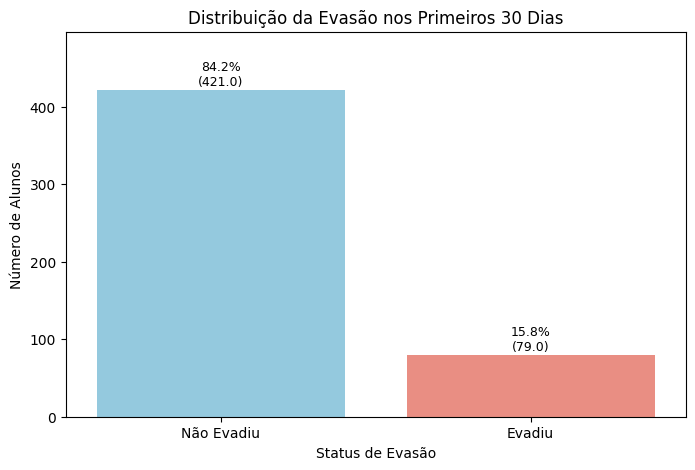

In [ ]:
# Variável para armazenar o DataFrame carregado.
try:
    df_carregado = pd.read_csv(df_tratado) # CARREGANDO O ARQUIVO
    print(f"DataFrame '{df_tratado}' carregado com sucesso!")
    print("Colunas no DataFrame carregado:", df_carregado.columns.tolist())
    print("\n")
except FileNotFoundError:
    print(f"ERRO: Arquivo '{df_tratado}' não encontrado. Verifique o nome e o caminho.")
    raise # Interrompe se o arquivo não for encontrado
except Exception as e:
    print(f"ERRO ao carregar o DataFrame: {e}")
    raise

print("--- Análise da Variável Alvo: evadiu_30_dias ---")

# Contagem e porcentagem de cada classe na variável alvo
# Use a variável que contém o DataFrame carregado: df_carregado
target_counts = df_carregado['evadiu_30_dias'].value_counts(dropna=False)
target_percentage = df_carregado['evadiu_30_dias'].value_counts(normalize=True, dropna=False) * 100

print("\nContagem de alunos por status de evasão:")
print(target_counts)
print("\nPorcentagem de alunos por status de evasão:")
print(target_percentage)

# Visualização da distribuição da variável alvo
plt.figure(figsize=(8, 5))
# Use a variável que contém o DataFrame carregado: df_carregado
sns.countplot(x='evadiu_30_dias', data=df_carregado, palette=['skyblue', 'salmon'], order=target_counts.index)
plt.title('Distribuição da Evasão nos Primeiros 30 Dias')
plt.xlabel('Status de Evasão')
plt.ylabel('Número de Alunos')

for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    label = target_counts.index[i]
    percentage_val = target_percentage[label]
    plt.text(bar.get_x() + bar.get_width()/2., height + 3,
             f'{percentage_val:.1f}%\n({height})',
             ha='center', va='bottom', fontsize=9)

plt.ylim(0, target_counts.max() * 1.18)
plt.show()

*A primeira parte do output confirma que o nosso arquivo de dados devidamente tratado foi carregado com sucesso e que todas as colunas, incluindo a `evadiu_30_dias`, estão presentes e com os nomes corretos em português.*

*Os números gerados são importantes pois:*
* *Dos 500 alunos no nosso estudo, **421 não evadiram** nos primeiros 30 dias, o que representa **84.2%** do total.*
* *Por outro lado, **79 alunos evadiram**, correspondendo a **15.8%**.*

---
**Visualização Gráfica da Evasão:**

*O gráfico de barras (representado na imagem acima) ilustra claramente essa diferença. A barra para "Não Evadiu" é significativamente maior do que a barra para "Evadiu".*

**Principal Conclusão desta Etapa:**
Identificamos um **desbalanceamento de classes** em nossa variável alvo. Ou seja, temos muito mais exemplos de alunos que *não* evadiram do que de alunos que evadiram. Este é um ponto crucial a ser lembrado quando for construir o modelo de previsão, pois pode influenciar tanto o treinamento quanto a forma como avalia o desempenho desses modelos.

Agora que entendemos o comportamento da nossa variável principal (evasão), podemos começar a investigar quais características dos alunos estão mais associadas a ela.

## Características Numéricas vs. Evasão

Agora que já conhecemos a proporção de alunos que evadiram, queremos descobrir se há alguma característica numérica que nos ajude a diferenciar os alunos que tendem a evadir daqueles que permanecem no curso. Por exemplo, será que a idade ou o tempo de uso da plataforma é diferente entre esses dois grupos?

Para investigar isso, o código a seguir realiza duas análises principais para cada característica numérica (como `idade`, `total_sessoes`, etc.):

1.  **Visualização com Boxplots Agrupados:** Ele cria "boxplots" lado a lado para cada característica. Um boxplot mostra a distribuição dos valores para os alunos que "Evadiram" e o outro para os que "Não Evadiram". Isso nos permite comparar visualmente se há diferenças nas medianas, na dispersão dos dados e na presença de valores extremos entre os dois grupos.
2.  **Cálculo de Estatísticas Descritivas Agrupadas:** Além da visualização, o código calcula um resumo estatístico (como média, mediana, desvio padrão, mínimo, máximo) para cada característica numérica, separadamente para o grupo que "Evadiu" e para o grupo que "Não Evadiu".



--- Boxplots: Variáveis Numéricas vs. Status de Evasão ---


<ipython-input-27-865d3d96e574>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='evadiu_30_dias', y=col_num, data=df_carregado, palette=['skyblue', 'salmon'])
<ipython-input-27-865d3d96e574>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='evadiu_30_dias', y=col_num, data=df_carregado, palette=['skyblue', 'salmon'])
<ipython-input-27-865d3d96e574>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='evadiu_30_dias', y=col_num, data=df_carregado, palette=['skyblue', 'salmon'])
<ipython-input-27-865d3d96e574>:10: FutureWarning: 

Passi

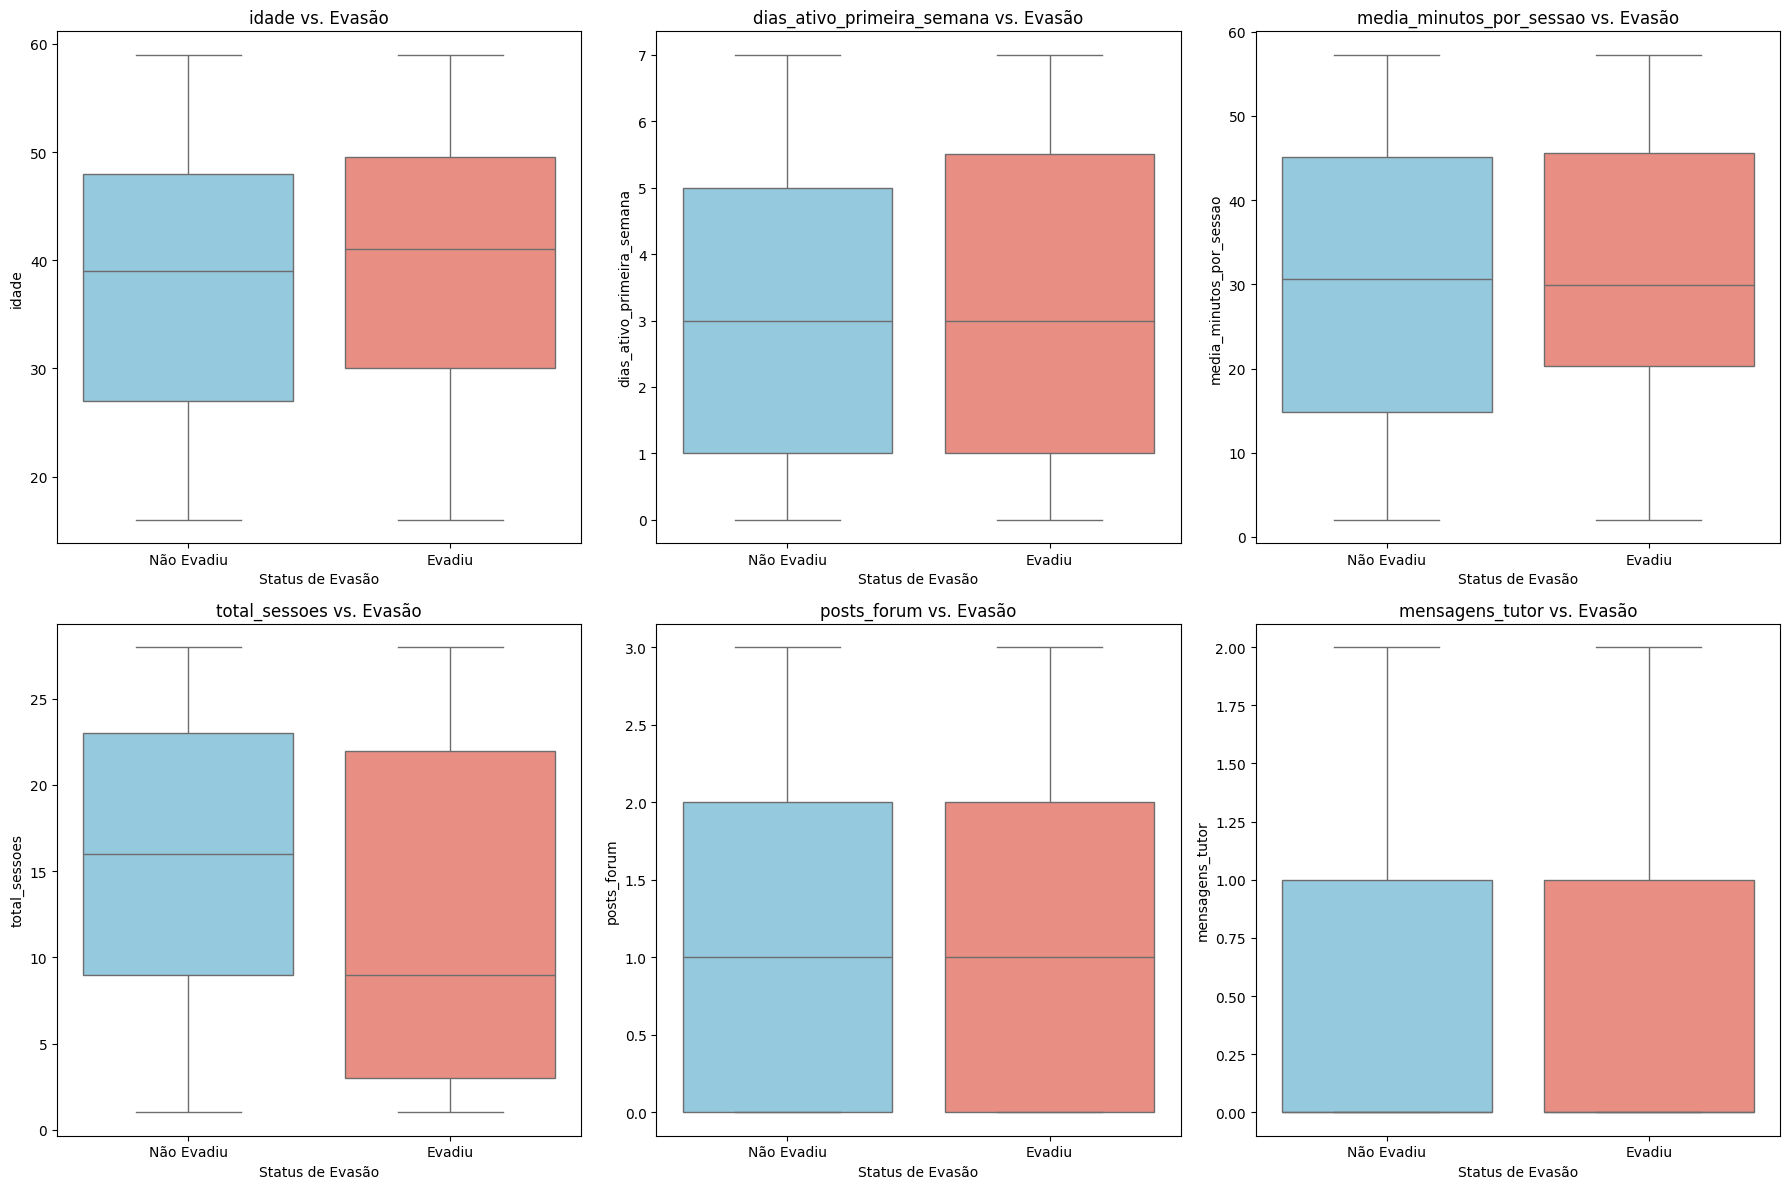


--- Estatísticas Descritivas Agrupadas por Status de Evasão ---

Estatísticas para 'idade':
                count       mean        std   min   25%   50%   75%   max
evadiu_30_dias                                                           
Evadiu           79.0  39.278481  12.774109  16.0  30.0  41.0  49.5  59.0
Não Evadiu      421.0  37.897862  12.728914  16.0  27.0  39.0  48.0  59.0
--------------------------------------------------

Estatísticas para 'dias_ativo_primeira_semana':
                count      mean       std  min  25%  50%  75%  max
evadiu_30_dias                                                    
Evadiu           79.0  3.139241  2.520349  0.0  1.0  3.0  5.5  7.0
Não Evadiu      421.0  3.432304  2.230375  0.0  1.0  3.0  5.0  7.0
--------------------------------------------------

Estatísticas para 'media_minutos_por_sessao':
                count       mean        std   min    25%    50%    75%    max
evadiu_30_dias                                                     

In [ ]:
# Selecionar as colunas numéricas (já com nomes traduzidos)
colunas_numericas = ['idade', 'dias_ativo_primeira_semana', 'media_minutos_por_sessao',
                     'total_sessoes', 'posts_forum', 'mensagens_tutor']

# 1. Visualização com Boxplots Agrupados
print("--- Boxplots: Variáveis Numéricas vs. Status de Evasão ---")
plt.figure(figsize=(18, 12)) # Ajustar tamanho para melhor visualização
for i, col_num in enumerate(colunas_numericas):
    plt.subplot(2, 3, i + 1) # Criar uma grade de 2 linhas x 3 colunas
    sns.boxplot(x='evadiu_30_dias', y=col_num, data=df_carregado, palette=['skyblue', 'salmon'])
    plt.title(f'{col_num} vs. Evasão')
    plt.xlabel('Status de Evasão')
    plt.ylabel(col_num)
plt.tight_layout() # Ajusta o layout para evitar sobreposição de títulos/rótulos
plt.show()

# 2. Estatísticas Descritivas Agrupadas
print("\n--- Estatísticas Descritivas Agrupadas por Status de Evasão ---")
for col_num in colunas_numericas:
    print(f"\nEstatísticas para '{col_num}':")
    # Usamos df_carregado aqui, que é o DataFrame que você carregou
    print(df_carregado.groupby('evadiu_30_dias')[col_num].describe())
    print("-" * 50)

### **Resultados: Comparando os Números dos que Evadiram vs. Não Evadiram**

**Visualização dos Boxplots Agrupados:**

*Ao observar os boxplots (representados na imagem acima), podemos comparar as "caixinhas" de quem "Evadiu" e quem "Não Evadiu" para cada característica numérica. Se as caixinhas estiverem em níveis muito diferentes ou tiverem tamanhos muito distintos, isso pode indicar uma diferença importante.*

---
**Resumo das Estatísticas para Cada Grupo:**

Abaixo, temos um resumo de como cada característica numérica se comporta para os alunos que evadiram e para os que não evadiram:

* **`idade`**:
    * Alunos que **Evadiram**: Média de idade ~39.3 anos (mediana 41 anos).
    * Alunos que **Não Evadiram**: Média de idade ~37.9 anos (mediana 39 anos).
    * *Observação: Há uma leve tendência de alunos que evadem serem um pouco mais velhos, mas as distribuições são bastante parecidas.*

* **`dias_ativo_primeira_semana`**:
    * Alunos que **Evadiram**: Média de ~3.1 dias ativos.
    * Alunos que **Não Evadiram**: Média de ~3.4 dias ativos.
    * *Observação: Alunos que não evadem foram, em média, ligeiramente mais ativos na primeira semana, mas a diferença é pequena.*

* **`media_minutos_por_sessao`**:
    * Alunos que **Evadiram**: Média de ~31.6 minutos por sessão.
    * Alunos que **Não Evadiram**: Média de ~30.0 minutos por sessão.
    * *Observação: As médias e medianas são muito próximas, não indicando uma diferença clara aqui.*

* **`total_sessoes`**:
    * Alunos que **Evadiram**: Média de ~12.0 sessões (mediana 9 sessões).
    * Alunos que **Não Evadiram**: Média de ~15.7 sessões (mediana 16 sessões).
    * *Observação: **Aqui vemos uma diferença mais significativa!** Alunos que não evadem tendem a ter um número consideravelmente maior de sessões na plataforma. Isso é visível tanto nas médias quanto nas medianas.*

* **`posts_forum`**:
    * Alunos que **Evadiram**: Média de ~1.11 posts.
    * Alunos que **Não Evadiram**: Média de ~1.17 posts.
    * *Observação: As médias e medianas são quase idênticas, sugerindo que a quantidade de posts no fórum não é um grande diferencial.*

* **`mensagens_tutor`**:
    * Alunos que **Evadiram**: Média de ~0.41 mensagens.
    * Alunos que **Não Evadiram**: Média de ~0.47 mensagens.
    * *Observação: Assim como os posts no fórum, a diferença é mínima. A maioria dos alunos, em ambos os grupos, envia poucas ou nenhuma mensagem (mediana de 0 para ambos).*

**Conclusão Preliminar (Variáveis Numéricas):**
A característica numérica que mais se destacou até agora por apresentar uma diferença clara entre os grupos foi o `total_sessoes`. Alunos com um maior número total de acessos à plataforma parecem ter uma tendência menor a evadir. As outras características numéricas mostraram diferenças mais sutis ou nenhuma diferença aparente.

## **Como Características como Gênero e Nível Educacional se Relacionam com a Evasão?**

Depois de analisar as características numéricas, voltamos nossa atenção para as **características categóricas**. Estas são informações que classificam os alunos em grupos, como `genero`, `nivel_educacional`, `categoria_curso`, entre outras. Queremos descobrir se a chance de um aluno evadir é diferente dependendo do grupo ao qual ele pertence.

Para cada uma dessas características categóricas, o código a seguir realiza três ações principais:

1.  **Cria uma "Tabela de Contingência"**: Esta tabela simplesmente conta, para cada categoria da característica (ex: para cada gênero), quantos alunos evadiram e quantos não evadiram.
2.  **Calcula a Porcentagem de Evasão**: Com base na tabela de contagem, calculamos qual a porcentagem de alunos que evadiram dentro de cada categoria. Isso nos ajuda a comparar a taxa de evasão entre os diferentes grupos.
3.  **Visualiza a Taxa de Evasão**: Um gráfico de barras é gerado para mostrar visualmente a taxa de evasão (%) para cada categoria da característica em questão. Isso facilita a identificação de quais grupos têm taxas de evasão mais altas ou mais baixas.


--- Análise: Variáveis Categóricas vs. Status de Evasão ---

----- Análise para a coluna: genero -----

Tabela de Contingência:
evadiu_30_dias  Evadiu  Não Evadiu
genero                            
Feminino            37         208
Masculino           35         173
Outro                7          40

Porcentagem de Evasão/Não Evasão por Categoria:
evadiu_30_dias   % Evadiu  % Não Evadiu
genero                                 
Masculino       16.826923     83.173077
Feminino        15.102041     84.897959
Outro           14.893617     85.106383


<ipython-input-28-8a9b1f9963ef>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y=plot_data.values, palette="viridis")


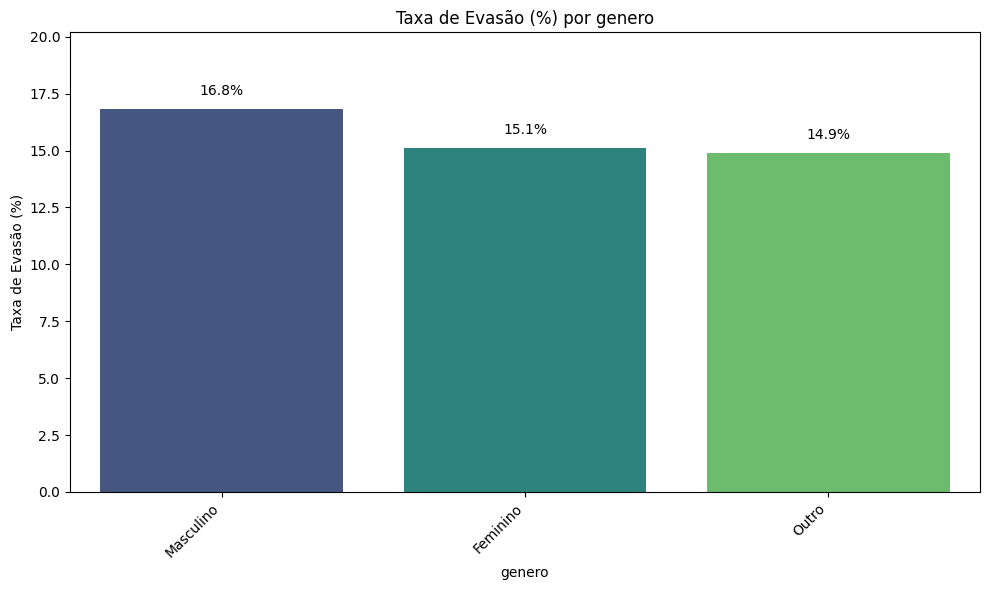

------------------------------------------------------------

----- Análise para a coluna: nivel_educacional -----

Tabela de Contingência:
evadiu_30_dias     Evadiu  Não Evadiu
nivel_educacional                    
Ensino Médio           23         113
Graduando(a)           17         111
Não Informado          20          87
Pós-graduado(a)        19         110

Porcentagem de Evasão/Não Evasão por Categoria:
evadiu_30_dias      % Evadiu  % Não Evadiu
nivel_educacional                         
Não Informado      18.691589     81.308411
Ensino Médio       16.911765     83.088235
Pós-graduado(a)    14.728682     85.271318
Graduando(a)       13.281250     86.718750


<ipython-input-28-8a9b1f9963ef>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y=plot_data.values, palette="viridis")


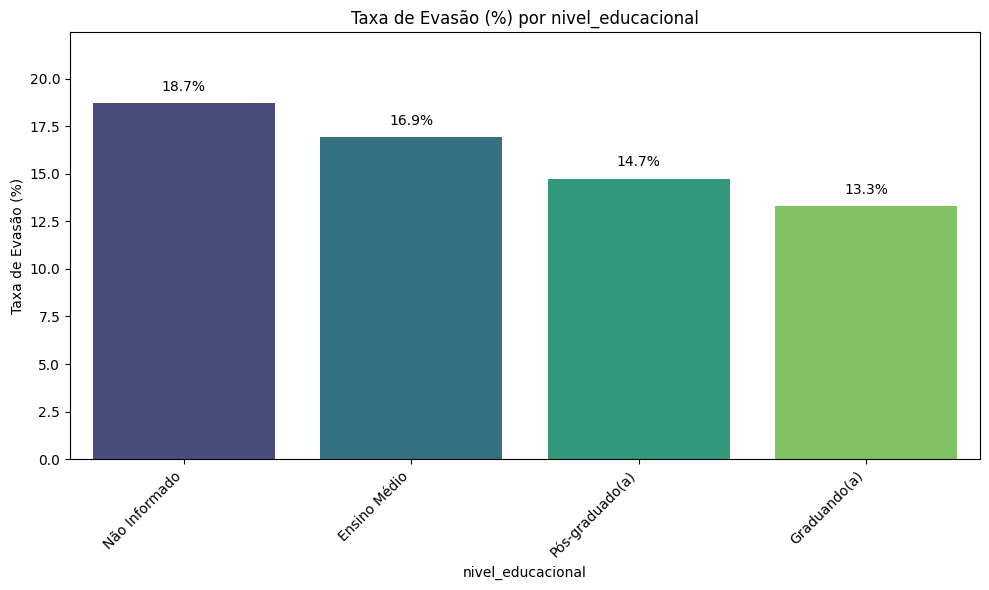

------------------------------------------------------------

----- Análise para a coluna: categoria_curso -----

Tabela de Contingência:
evadiu_30_dias   Evadiu  Não Evadiu
categoria_curso                    
Design               24          93
Idiomas              17         116
Negócios             21         111
Tecnologia           17         101

Porcentagem de Evasão/Não Evasão por Categoria:
evadiu_30_dias    % Evadiu  % Não Evadiu
categoria_curso                         
Design           20.512821     79.487179
Negócios         15.909091     84.090909
Tecnologia       14.406780     85.593220
Idiomas          12.781955     87.218045


<ipython-input-28-8a9b1f9963ef>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y=plot_data.values, palette="viridis")


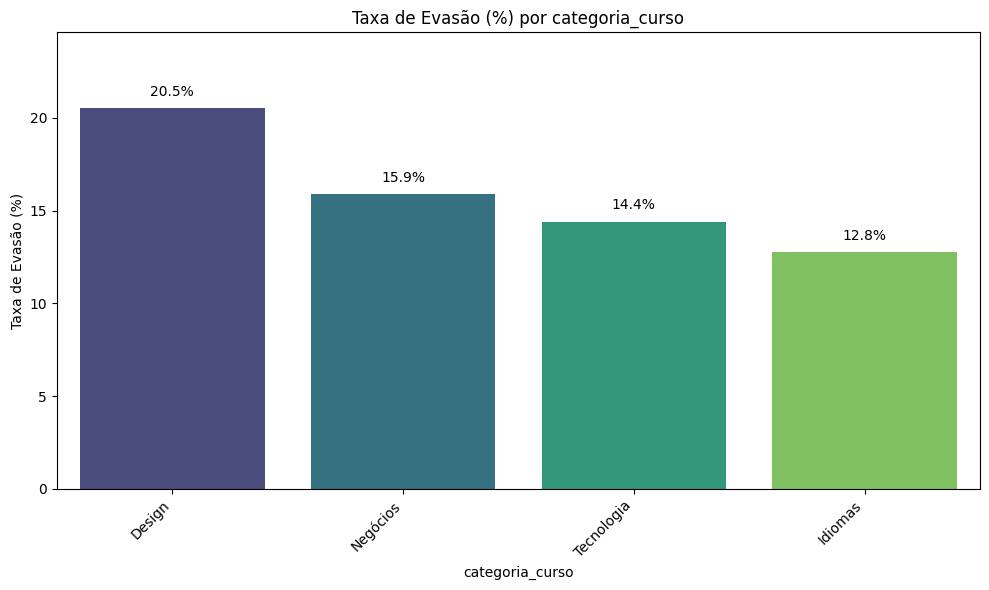

------------------------------------------------------------

----- Análise para a coluna: concluiu_primeiro_quiz -----

Tabela de Contingência:
evadiu_30_dias          Evadiu  Não Evadiu
concluiu_primeiro_quiz                    
Concluiu                    27         169
Não Concluiu                52         252

Porcentagem de Evasão/Não Evasão por Categoria:
evadiu_30_dias           % Evadiu  % Não Evadiu
concluiu_primeiro_quiz                         
Não Concluiu            17.105263     82.894737
Concluiu                13.775510     86.224490


<ipython-input-28-8a9b1f9963ef>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y=plot_data.values, palette="viridis")


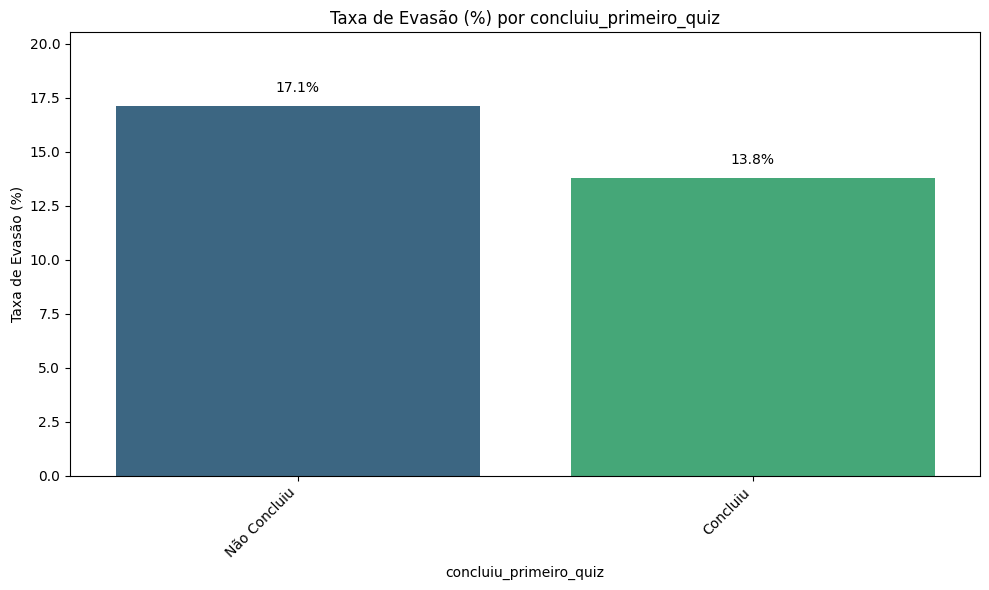

------------------------------------------------------------

----- Análise para a coluna: tipo_assinatura -----

Tabela de Contingência:
evadiu_30_dias   Evadiu  Não Evadiu
tipo_assinatura                    
Grátis               61         290
Pago                 18         131

Porcentagem de Evasão/Não Evasão por Categoria:
evadiu_30_dias    % Evadiu  % Não Evadiu
tipo_assinatura                         
Grátis           17.378917     82.621083
Pago             12.080537     87.919463


<ipython-input-28-8a9b1f9963ef>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y=plot_data.values, palette="viridis")


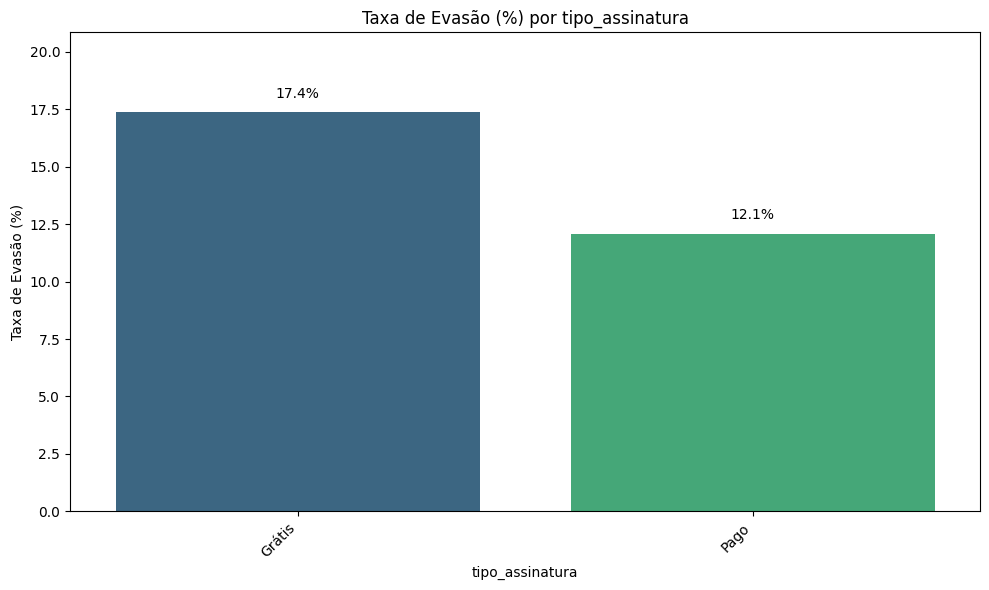

------------------------------------------------------------

----- Análise para a coluna: tipo_dispositivo -----

Tabela de Contingência:
evadiu_30_dias    Evadiu  Não Evadiu
tipo_dispositivo                    
Desktop               28         133
Mobile                17         150
Tablet                34         138

Porcentagem de Evasão/Não Evasão por Categoria:
evadiu_30_dias     % Evadiu  % Não Evadiu
tipo_dispositivo                         
Tablet            19.767442     80.232558
Desktop           17.391304     82.608696
Mobile            10.179641     89.820359


<ipython-input-28-8a9b1f9963ef>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y=plot_data.values, palette="viridis")


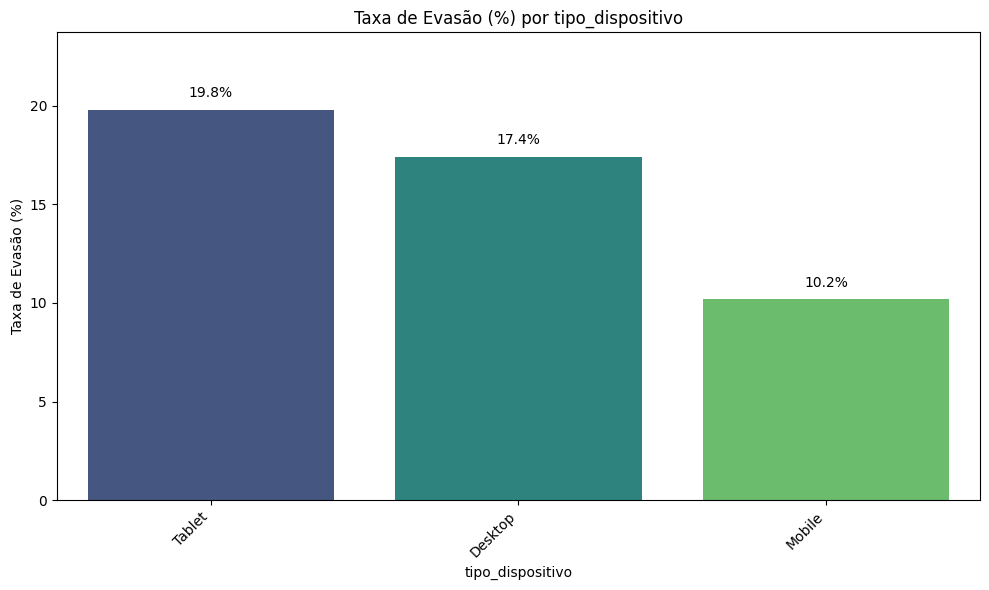

------------------------------------------------------------


In [ ]:
# Lista das colunas categóricas
colunas_categoricas = ['genero', 'nivel_educacional', 'categoria_curso',
                       'concluiu_primeiro_quiz', 'tipo_assinatura', 'tipo_dispositivo']

print("--- Análise: Variáveis Categóricas vs. Status de Evasão ---")

for col_cat in colunas_categoricas:
    print(f"\n----- Análise para a coluna: {col_cat} -----")

    # 1. Tabela de Contingência (Crosstab)
    crosstab_df = pd.crosstab(df_carregado[col_cat], df_carregado['evadiu_30_dias'])
    print("\nTabela de Contingência:")
    print(crosstab_df)

    # 2. Porcentagem de Evasão por Categoria
    # Adicionar uma coluna de total para calcular a porcentagem
    crosstab_df['Total'] = crosstab_df.sum(axis=1)
    # Calcular a porcentagem de quem 'Evadiu' e 'Não Evadiu'
    # Certifique-se que as colunas 'Evadiu' e 'Não Evadiu' existem na crosstab_df
    if 'Evadiu' in crosstab_df.columns:
        crosstab_df['% Evadiu'] = (crosstab_df['Evadiu'] / crosstab_df['Total']) * 100
    if 'Não Evadiu' in crosstab_df.columns:
        crosstab_df['% Não Evadiu'] = (crosstab_df['Não Evadiu'] / crosstab_df['Total']) * 100

    print("\nPorcentagem de Evasão/Não Evasão por Categoria:")
    if '% Evadiu' in crosstab_df.columns:
        print(crosstab_df[['% Evadiu', '% Não Evadiu']].sort_values(by='% Evadiu', ascending=False))
    else: # Caso apenas uma classe de evasão esteja presente em alguma categoria (improvável mas para segurança)
        print(crosstab_df)


    # 3. Visualização (Gráfico de Barras da Taxa de Evasão)
    # Focaremos na taxa de evasão para a visualização, pois é nosso principal interesse
    if '% Evadiu' in crosstab_df.columns:
        plt.figure(figsize=(10, 6))
        # crosstab_df já contém a porcentagem, vamos usá-la
        # Queremos plotar a taxa de evasão, que é a coluna '% Evadiu'
        # Precisamos do DataFrame no formato longo para o barplot ou manipular para plotar corretamente
        # Maneira mais simples é plotar a coluna de porcentagem diretamente
        plot_data = crosstab_df['% Evadiu'].sort_values(ascending=False)

        sns.barplot(x=plot_data.index, y=plot_data.values, palette="viridis")
        plt.title(f'Taxa de Evasão (%) por {col_cat}')
        plt.xlabel(col_cat)
        plt.ylabel('Taxa de Evasão (%)')
        plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor leitura
        # Adicionar anotações de porcentagem nas barras
        for i, v in enumerate(plot_data.values):
            plt.text(i, v + 0.5, f"{v:.1f}%", color='black', ha='center', va='bottom')
        plt.ylim(0, plot_data.max() * 1.2 if plot_data.max() > 0 else 10) # Ajuste do eixo y
        plt.tight_layout()
        plt.show()
    print("-" * 60)

**Visualização da Taxa de Evasão por Genêro:**
* *Alunos do gênero **Masculino** tiveram uma taxa de evasão de aproximadamente **16.8%**.*
* *Alunos do gênero **Feminino** tiveram uma taxa de evasão de aproximadamente **15.1%**.*
* *Alunos que se identificaram como **Outro** tiveram uma taxa de evasão de aproximadamente **14.9%**.*

**Conclusão Preliminar para o `genêro`:**
Embora haja uma pequena variação na taxa de evasão entre os gêneros, com o masculino apresentando a taxa um pouco mais elevada, as diferenças não parecem ser drásticas. O gênero, isoladamente, pode não ser o fator mais forte para prever a evasão, mas é uma peça do quebra-cabeça que estamos montando.

---

**Visualização da Taxa de Evasão por Nível Educacional:**
* *Alunos com nível educacional **Não Inforamado** tiveram a `maior` taxa de evasão de aproximadamente **18.8%**.*
* *Alunos com nível educacional **Ensino Médio** tiveram uma taxa de evasão de aproximadamente **16.9%**.*
* *Alunos com nível educacional **Graduando** tiveram a `menor` taxa de evasão de aproximadamente **13.3%**.*
* *Alunos com nível educacional **Pós-Graduando** tiveram a `segunda menor taxa` de evasão de aproximadamente **14.7%**.*

**Conclusão Preliminar para `nivel_educacional`:**
A maior taxa de evasão vem do grupo de `Não Informado`e a menor taxa vem de `Pós-Graduand`. Sendo assim, concluímos que dependendo do nível de escolaridade pode influenciar a permanência no curso.

---

**Visualização da Taxa de Evasão por Categoria do Curso:**
* *Alunos do curso de **Design** tiveram a `maior` taxa de evasão de aproximadamente **20.51**.*
* *Alunos do curso de **Negócios** tiveram uma tax de evasão de aproximadamente **15.90**.*
* *Alunos do curso de **Tecnologia** tiveram uma taxa de evasão de aproximadamente **14.40**.*
* *Alunos do curso de **Idiomas** tiveram a `menor` taxa de evasão de aproximadamente **12.78**.*

**Conclusão Preliminar para `nivel_educacional`:**
A categoria de curso "Design" apresenta a taxa de evasão mais alta (cerca de 20.5%). Em contraste, cursos de "Idiomas" têm a menor taxa de evasão (12.8%). As categorias "Negócios" (15.9%) e "Tecnologia" (14.4%) ficam entre esses extremos. Isso indica que o tipo de curso escolhido pode ser um fator relevante na evasão.

---


**Visualização da Taxa de Evasão por ter Completado o Primeiro Quiz:**

Alunos que `"Não Concluiu"` o primeiro quiz apresentam uma taxa de evasão um pouco mais alta (17.1%) em comparação com aqueles que `"Concluiu"` (13.8%). Completar uma primeira atividade avaliativa parece estar associado a uma maior chance de permanência.

---

**Visualização da Taxa de Evasão pelo Tipo de Assinatura:**

Alunos com assinatura "Grátis" têm uma taxa de evasão notavelmente maior (17.4%) em comparação com aqueles que têm uma assinatura "Pago" (12.1%). O investimento financeiro parece estar relacionado a um maior comprometimento.

---

**Visualização da Taxa de Evasão pelo Tipo de Dispositivo:**

O tipo de dispositivo mostra diferenças interessantes: alunos que acessam o curso predominantemente via "Mobile" têm a menor taxa de evasão (10.2%). Por outro lado, usuários de "Tablet" apresentam a taxa mais alta (19.8%), seguidos pelos de "Desktop" (17.4%).

